In [62]:
# needed libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import colormaps, cm
from sklearn.preprocessing import MinMaxScaler

from plotter import parallel_plots_many_policies, parallel_plots_many_principles


# 1. Data Preperation

## 1.1 Data Collection

In [4]:
# Define the subfolder names corresponding to different experiments.
subfoldernames = ["nfe250000_None_bigger", "nfe250000_uwf_bigger", "nfe250000_pwf_bigger", "nfe250000_gini_bigger"]

In [5]:
def get_principle(s):
    for principle in ["None", "uwf", "pwf", "gini"]:
        if principle in s:
            return principle
    raise ValueError("Invalid string, principle not recognized.")

In [6]:
results = {}
for subfolder in subfoldernames:
    opt_results = pd.read_csv(f"../outputs/{subfolder}/baseline_results_{subfolder}.csv", index_col=[0])
    principle = get_principle(subfolder)
    results[principle] = opt_results

In [7]:
# Displaying shape of each dataframe
for key, df in results.items():
    print(f"\nPrinciple: {key}")
    print(f"Shape: {df.shape}")


Principle: None
Shape: (177, 170)

Principle: uwf
Shape: (832, 171)

Principle: pwf
Shape: (854, 171)

Principle: gini
Shape: (293, 171)


## 1.2 Data Cleaning

In [8]:
policy_results = {}
objective_results = {}

for key, df in results.items():
    if key == "None":
        split_point = -6
    else:
        split_point = -7
    
    policies, objectives = df.iloc[:, :split_point], df.iloc[:, split_point:]
    policy_results[key] = policies
    objective_results[key] = objectives
    # Printing shape information
    print(f"Principle: {key}")
    print(f"Shape of policies: {policies.shape}")
    print(f"Shape of objectives: {objectives.shape}\n")

Principle: None
Shape of policies: (177, 164)
Shape of objectives: (177, 6)

Principle: uwf
Shape of policies: (832, 164)
Shape of objectives: (832, 7)

Principle: pwf
Shape of policies: (854, 164)
Shape of objectives: (854, 7)

Principle: gini
Shape of policies: (293, 164)
Shape of objectives: (293, 7)



In [9]:
# Concatenate all the dataframes in objective_results into one dataframe
df_all_principles = pd.concat(objective_results, names=["Principle", "Index"])
df_all_principles

egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  \
Principle Index                                                            
None      0       4.708346  1.691684       0.141667   9.946539  1.706105   
          1       3.846794  1.288469       0.158333  10.314356  1.565600   
          2       5.077042  1.283620       0.754167   8.805921  1.446252   
          3       4.967579  1.476072       0.400000   6.798282  1.467693   
          4       5.367931  1.861499       0.495833   5.975961  1.379873   
...                    ...       ...            ...        ...       ...   
gini      288    13.804131  3.536357       0.000000   9.398901  1.532277   
          289     5.474456  1.772790       0.279167   7.346545  1.436403   
          290     9.779693  2.980778       0.000000   7.419051  1.457709   
          291     4.999356  1.815318       0.000000   7.757593  1.670673   
          292     5.903366  2.045368       0.000000   8.971737  1.492967   

                 ethiopia_hydro  principle_result  
Principle Index                                    
None      0           15.030984               NaN  
          1           11.831712               NaN  
          2           12.241481               NaN  
          3           10.259496               NaN  
          4           11.067578               NaN  
...                         ...               ...  
gini      288         10.194567       2165.135772  
          289         14.463310          0.166649  
          290         10.039862          2.146541  
          291          2.367639          1.082555  
          292         14.387332          1.024258  

[2156 rows x 7 columns]

## 1.3 Exploratory Data Analysis

In [10]:
# Determine the number of principles and objectives
num_principles = len(objective_results.keys())
first_principle = list(objective_results.keys())[0]
num_objectives = objective_results[first_principle].shape[1]

In [11]:
# # Create subplots
# fig, axes = plt.subplots(num_principles, num_objectives, figsize=(15, 5 * num_principles), sharex=False, sharey=False)

# for p_idx, (principle, objectives_df) in enumerate(objective_results.items()):
#     for o_idx in range(num_objectives):
#         ax = axes[p_idx][o_idx] if num_principles > 1 else axes[o_idx]
        
#         # Check if this principle has data for the current objective
#         if o_idx < objectives_df.shape[1]:
#             objective_column = objectives_df.columns[o_idx]
#             sns.histplot(objectives_df[df.columns][objective_column], ax=ax, kde=True, bins=30)
#             if p_idx == 0:
#                 ax.set_title(objective_column)
#         else:
#             ax.axis("off")  # Turn off axes for empty plots
        
#         if o_idx == 0:
#             ax.set_ylabel(principle)

# plt.tight_layout()
# plt.show()


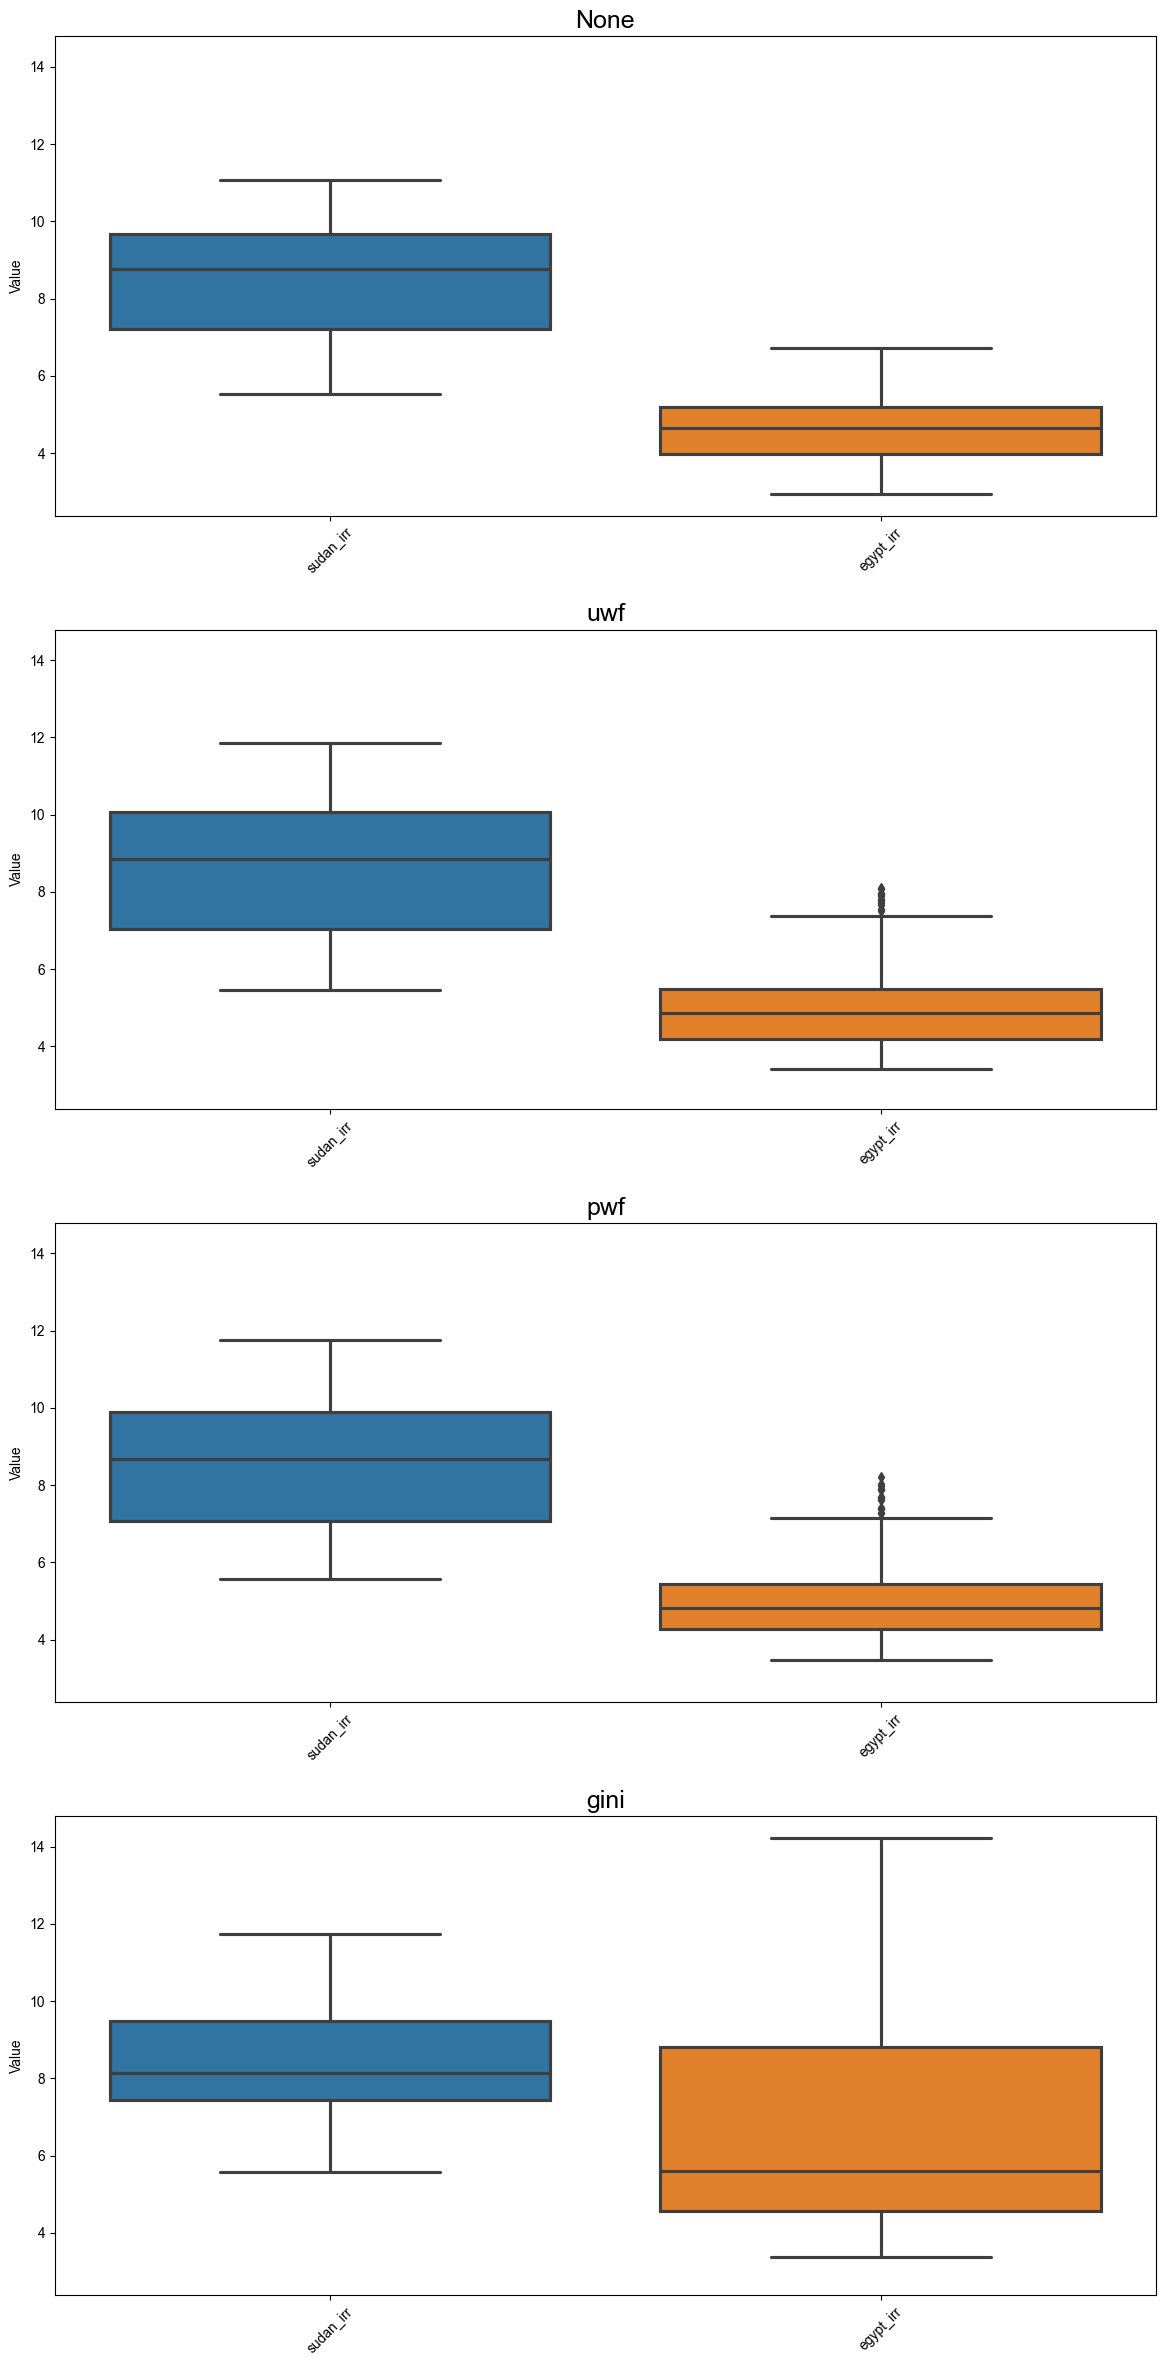

In [12]:
# Objectives of interest
objectives_of_interest = ['sudan_irr', 'egypt_irr']

# Create subplots for each principle
fig, axes = plt.subplots(num_principles, 1, figsize=(12, 6 * num_principles), sharex=False, sharey=True)

# Seaborn style and context for better aesthetics and readability
sns.set_style("whitegrid")
sns.set_context("talk")  # 'talk' context is suitable for presentations, 'paper' or 'notebook' can be used for other scenarios

for p_idx, (principle, objectives_df) in enumerate(objective_results.items()):
    ax = axes[p_idx] if num_principles > 1 else axes
    
    if set(objectives_of_interest).issubset(objectives_df.columns):
        sns.boxplot(data=objectives_df[objectives_of_interest], ax=ax)
        ax.set_title(principle)
        ax.set_ylabel("Value")  # since the units/quantity might be common, else adjust as per your data
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotating x labels for better visibility

plt.tight_layout()
plt.show()

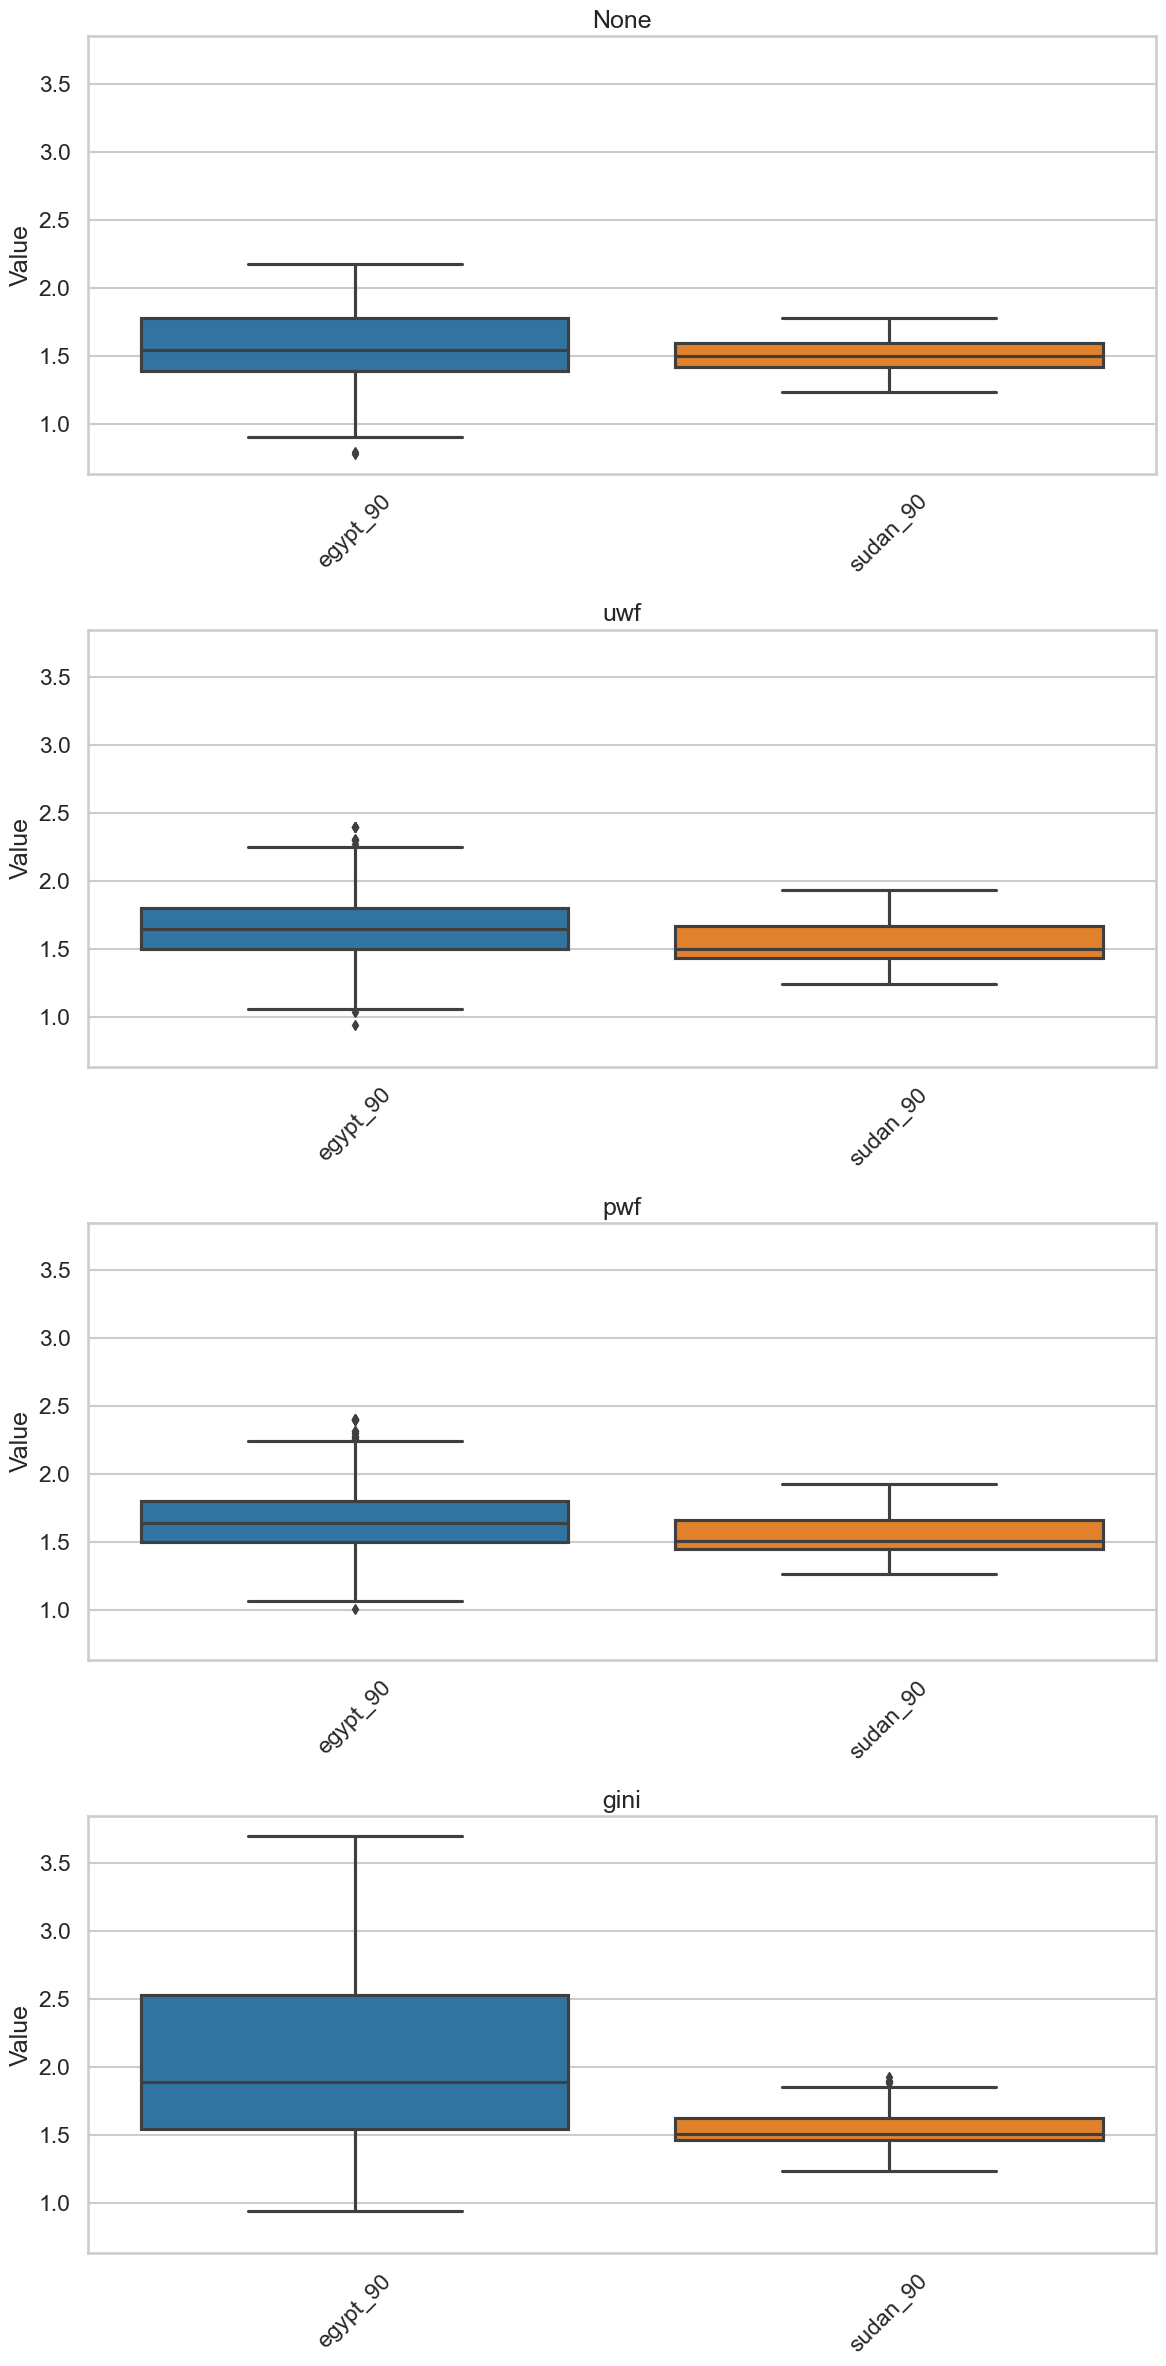

In [13]:
# Objectives of interest
objectives_of_interest = ['egypt_90','sudan_90']

# Create subplots for each principle
fig, axes = plt.subplots(num_principles, 1, figsize=(12, 6 * num_principles), sharex=False, sharey=True)

# Seaborn style and context for better aesthetics and readability
sns.set_style("whitegrid")
sns.set_context("talk")  # 'talk' context is suitable for presentations, 'paper' or 'notebook' can be used for other scenarios

for p_idx, (principle, objectives_df) in enumerate(objective_results.items()):
    ax = axes[p_idx] if num_principles > 1 else axes
    
    if set(objectives_of_interest).issubset(objectives_df.columns):
        sns.boxplot(data=objectives_df[objectives_of_interest], ax=ax)
        ax.set_title(principle)
        ax.set_ylabel("Value")  # since the units/quantity might be common, else adjust as per your data
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotating x labels for better visibility

plt.tight_layout()
plt.show()

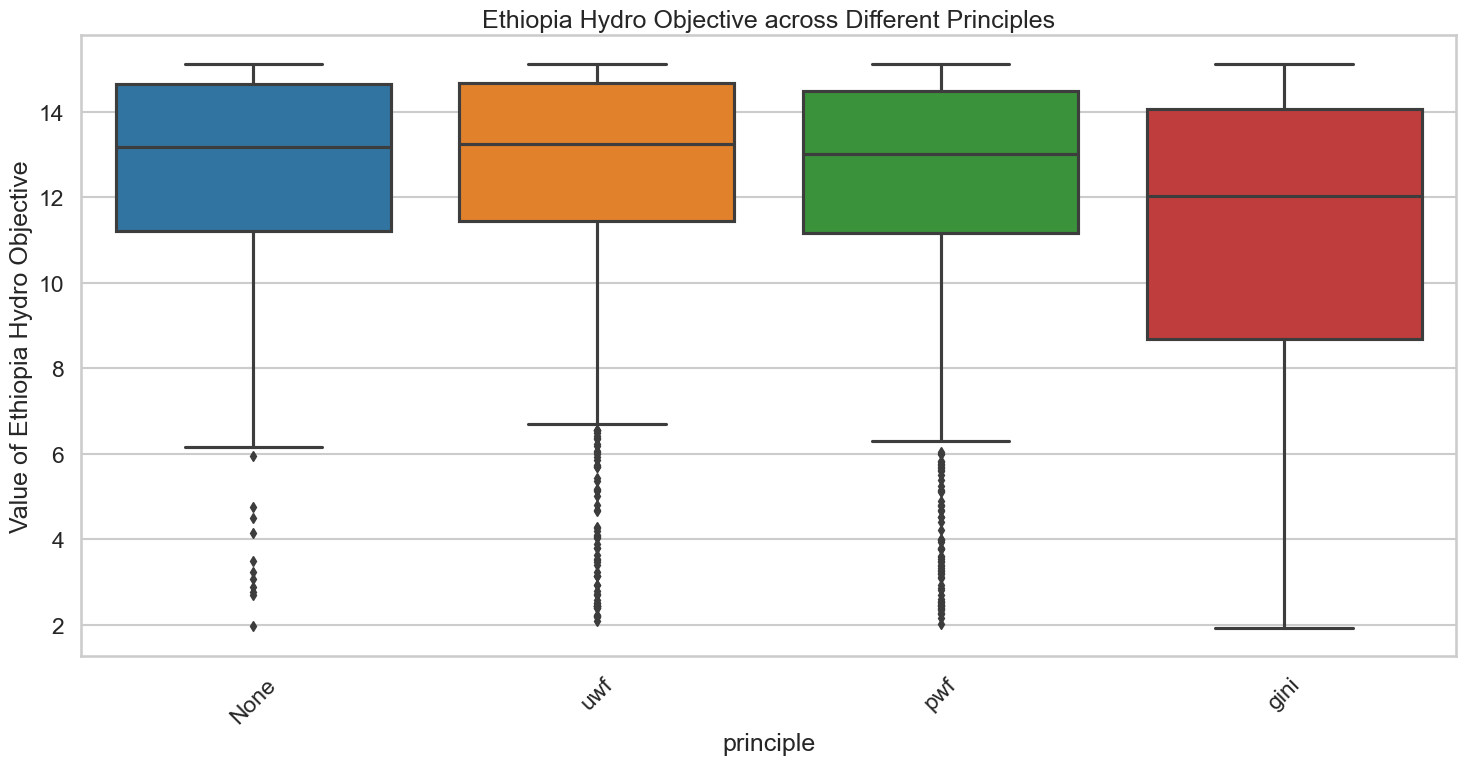

In [14]:
# Extract the 'ethiopia_hydro' data for every principle and stack them together with the principle as a categorizing column
data_list = []
for principle, objectives_df in objective_results.items():
    if 'ethiopia_hydro' in objectives_df.columns:
        temp_df = objectives_df[['ethiopia_hydro']].copy()
        temp_df['principle'] = principle
        data_list.append(temp_df)

combined_data = pd.concat(data_list)

# Plot
plt.figure(figsize=(15, 8))

# Seaborn style and context for better aesthetics and readability
sns.set_style("whitegrid")
sns.set_context("talk")  # 'talk' context is suitable for presentations

sns.boxplot(data=combined_data, x='principle', y='ethiopia_hydro')

plt.title("Ethiopia Hydro Objective across Different Principles")
plt.ylabel("Value of Ethiopia Hydro Objective")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##

# 2. A Posteriori Analysis

## 2.1 Posteriori with results from "None" run

In [15]:
df_none = df_all_principles.loc[('None',), :].drop(columns="principle_result")
df_none

egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  ethiopia_hydro
Index                                                                         
0       4.708346  1.691684       0.141667   9.946539  1.706105       15.030984
1       3.846794  1.288469       0.158333  10.314356  1.565600       11.831712
2       5.077042  1.283620       0.754167   8.805921  1.446252       12.241481
3       4.967579  1.476072       0.400000   6.798282  1.467693       10.259496
4       5.367931  1.861499       0.495833   5.975961  1.379873       11.067578
...          ...       ...            ...        ...       ...             ...
172     4.395644  1.489867       0.283333   7.617323  1.469091        9.452211
173     3.692827  1.284626       0.216667  10.632840  1.596565       12.097595
174     5.279238  1.743900       0.258333   7.639305  1.599628       15.025730
175     3.454759  1.013864       0.079167  10.681013  1.735744       14.319497
176     4.146458  1.367876       0.166667   8.958400  1.525423        7.966226

[177 rows x 6 columns]

In [16]:
def get_best_solutions(dataframe, objective_directions):
    """
    Get the index of the best performing solution for each objective based on the specified objective directions.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing the objective values.
        objective_directions (dict): A dictionary mapping each objective column name to its direction ('min' or 'max').

    Returns:
        dict: A dictionary mapping each objective column name to the index of the best performing solution.

    """
    if not set(objective_directions.values()).issubset({'min', 'max'}):
        raise ValueError("Invalid objective direction. Must be 'min' or 'max'.")

    best_solutions = {}

    for column, direction in objective_directions.items():
        if direction == 'max':
            best_index = dataframe[column].idxmax()
        elif direction == 'min':
            best_index = dataframe[column].idxmin()

        best_solutions[column] = best_index

    return best_solutions

In [17]:
# the direction at which the objectives are optimized are put in a dictionary
directions = {'egypt_irr': 'min', 'egypt_90': 'min', 'egypt_low_had': 'min', 'sudan_irr': 'min', 'sudan_90': 'min',
       'ethiopia_hydro': 'max'}

In [18]:
best_solutions = get_best_solutions(df_none, directions)
print(best_solutions)

{'egypt_irr': 164, 'egypt_90': 115, 'egypt_low_had': 23, 'sudan_irr': 65, 'sudan_90': 65, 'ethiopia_hydro': 8}


In [19]:
def create_global_variables(best_obj_indices, policies):
    """
    Create individual variables dynamically using a loop.

    Parameters:
        best_obj_indices (dict): A dictionary containing the objective names as keys and their
                                 corresponding best value indices as values.
        policies (DataFrame): The DataFrame containing the data.

    Returns:
        list: A list of the names of the created global variables.
    """
    created_global_variable_names = []
    created_global_variables = []
    merged_keys_dict = {}

    for obj_name, obj_indices in best_obj_indices.items():
        if not isinstance(obj_indices, (list, tuple)):
            obj_indices = [obj_indices]  # Convert to list if it's a single index
        value = tuple(obj_indices)
        if value in merged_keys_dict:
            merged_keys_dict[value].append(obj_name)
        else:
            merged_keys_dict[value] = [obj_name]

    for value, obj_names in merged_keys_dict.items():
        # Check if the indices are unique for the merged keys
        if len(obj_names) == 1:
            obj_name = obj_names[0]
            global_variable_name = f"best_{obj_name}"
            globals()[global_variable_name] = best_obj_indices[obj_name]
            created_global_variable_names.append(global_variable_name)
            created_global_variables.append(globals()[global_variable_name])
        else:
            # If the indices are not unique, merge the key strings
            merged_key_string = "_".join(obj_names)
            global_variable_name = f"best_{merged_key_string}"
            globals()[global_variable_name] = value
            created_global_variable_names.append(global_variable_name)
            created_global_variables.append(globals()[global_variable_name])

    return created_global_variable_names, created_global_variables

In [20]:
created_vars_names, created_vars = create_global_variables(best_solutions, df_none)

In [21]:
# # to create the parallel coordinates plot, every solution is classified based on the objectives
# df_objectives['class_obj'] = 'general'

# for column, best_index in best_solutions.items():
#     if df_objectives.at[best_index, 'class_obj'] == 'general':
#         df_objectives.at[best_index, 'class_obj'] = 'best_' + str(column)
#     else:
#         df_objectives.at[best_index, 'class_obj'] += ' and ' + str(column)
# df_objectives

In [22]:
print(created_vars_names)

['best_egypt_irr', 'best_egypt_90', 'best_egypt_low_had', 'best_sudan_irr_sudan_90', 'best_ethiopia_hydro']


['All Solutions' 'best_ethiopia_hydro' 'best_egypt_low_had'
 'best_sudan_irr_sudan_90' 'best_egypt_90' 'best_egypt_irr']


I'm here


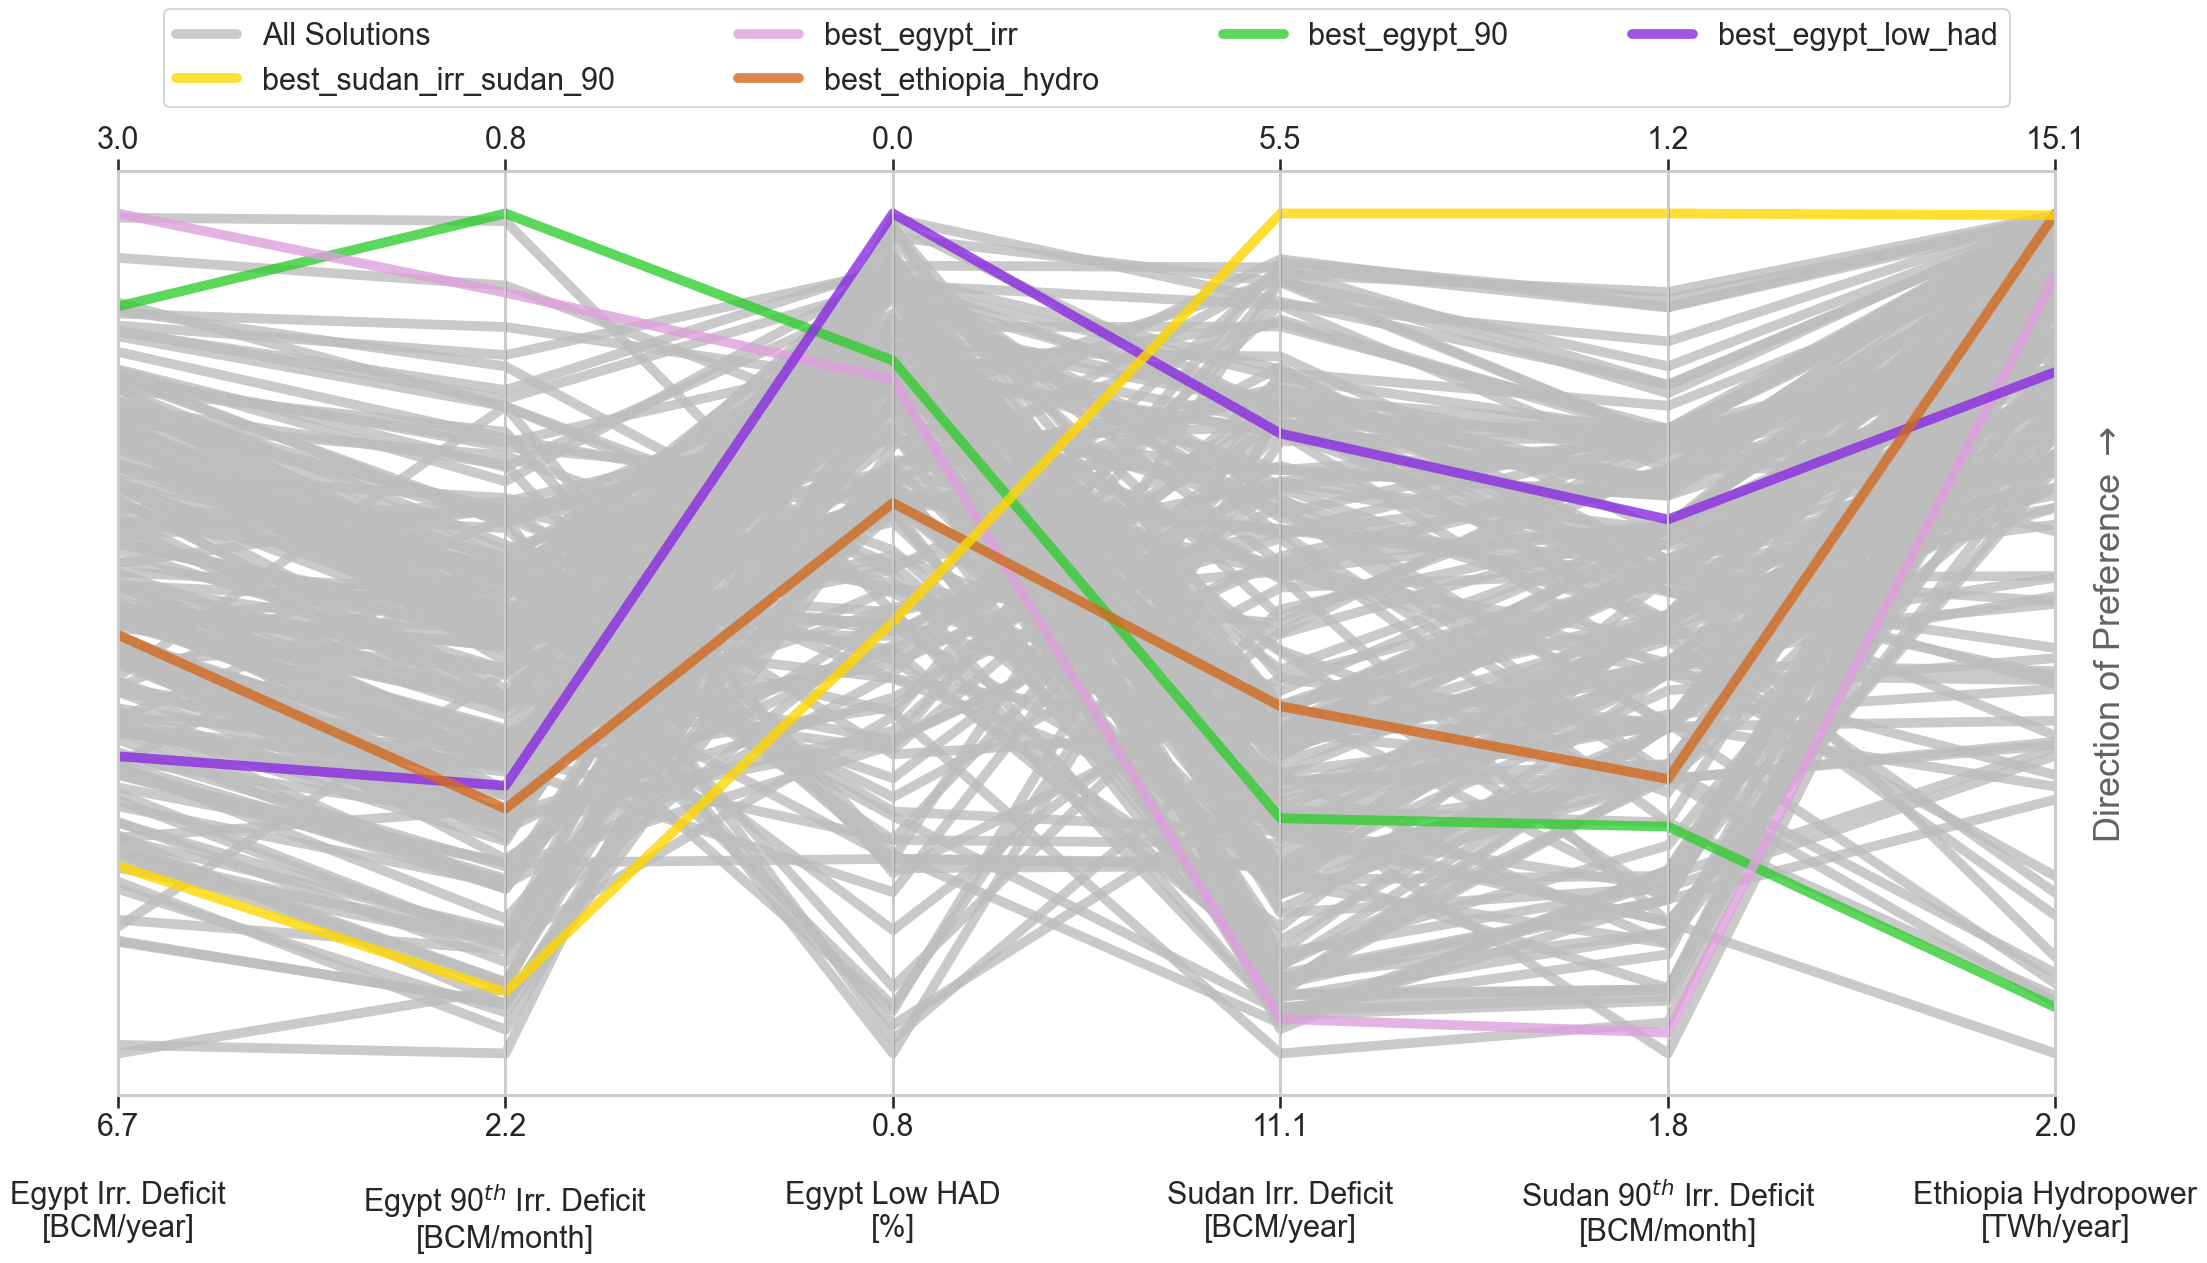

In [23]:
parallel_plots_many_policies(
    df_none,
    created_vars,
    created_vars_names,
    names_display=[
        "Egypt Irr. Deficit",
        "Egypt 90$^{th}$ Irr. Deficit",
        "Egypt Low HAD",
        "Sudan Irr. Deficit",
        "Sudan 90$^{th}$ Irr. Deficit",
        "Ethiopia Hydropower",
    ],
    units=["BCM/year", "BCM/month", "%", "BCM/year", "BCM/month", "TWh/year", "-"],
    directions=["min", "min", "min", "min", "min", "max", "max"],
)
plt.show()

In [24]:
# def normalize_dataframe(df: pd.DataFrame, objective_directions: dict, inplace: bool = False):
#     """
#     Normalize the specified columns of a DataFrame based on objective directions.

#     Args:
#         df (pd.DataFrame): The input DataFrame to be normalized.
#         objective_directions (dict): A dictionary specifying the objective direction for each column.
#             Keys should be column names, and values should be either 'min' or 'max'.
#         inplace (bool, optional): Flag indicating whether to modify the DataFrame in-place or return a copy.
#             Defaults to False.

#     Returns:
#         pd.DataFrame: The normalized DataFrame.

#     Raises:
#         ValueError: If an invalid objective direction is specified.

#     """
#     if not set(objective_directions.values()).issubset({'min', 'max'}):
#         raise ValueError("Invalid objective direction. Must be 'min' or 'max'.")

#     normalized_df = df.copy() if not inplace else df

#     for column in df.columns:
#         if column in objective_directions:
#             direction = objective_directions[column]
#             values = df[column]

#             if direction == 'max':
#                 normalized_values = (values - values.min()) / (values.max() - values.min())
#             else:  # direction == 'min'
#                 normalized_values = (values.max() - values) / (values.max() - values.min())

#             normalized_df[column] = normalized_values

#     return normalized_df


In [25]:
# # the objectives dataframe is normalized
# df_obj_norm = normalize_dataframe(df_objectives, directions)
# df_obj_norm

In [26]:
# # a parallel coordinates plot of the normalized objective values for every solution
# plot_parallel_coordinates(df_obj_norm, 'class_obj', 'Objectives', 'Normalized value', 'Parallel coordinates plot of normalized objective values.')

In [27]:
# def calculate_coefficient_of_variation(dataframe: pd.DataFrame, columns: list):
#     """
#     Calculate the coefficient of variation for selected columns in the input DataFrame and return a new DataFrame.

#     The coefficient of variation (CV) measures the relative variability of a dataset, defined as the ratio
#     of the standard deviation to the mean. It provides a standardized measure of dispersion.

#     Args:
#         dataframe (pd.DataFrame): The input DataFrame.
#         columns (list): A list of column names for which to calculate the coefficient of variation.

#     Returns:
#         pd.DataFrame: A new DataFrame with the selected columns replaced by their respective coefficient of variation.

#     """
#     df_none = dataframe.copy()

#     # Calculate the standard deviation for selected columns
#     std_deviation = df_none[columns].std()

#     # Calculate the mean for selected columns
#     mean = df_none[columns].mean()

#     # Calculate the coefficient of variation for selected columns
#     df_none[columns] = (df_none[columns] - mean) / std_deviation

#     return df_none


In [28]:
# # the objectives dataframe with their values replaced by their coefficient of variation
# df_obj_cov = calculate_coefficient_of_variation(df_objectives, obj)
# df_obj_cov

In [29]:
# plot_parallel_coordinates(df_obj_cov, 'class_obj', 'Objectives', 'Coefficient of variation', 'Parallel coordinates plot of coefficient of variation values.')

## 2.2 Best Solutions for Principles

### 2.2.1 Normalization

#### 2.2.1.1 Normalization with origins

In [30]:
# normalize using origins 
origins = [8.788731074232397, 2.589923980805939, 0.0, 6.932669593073758, 1.0944404855138898, 8.409578390443805]

# Define a function to calculate the normalized value
def normalize_value(a, b):
    return ((a - b) / b) if b != 0 else a

# Apply the function to each cell in the DataFrame using applymap
df_none_norm = df_none.copy()  # Create a copy to store normalized values

for col in df_none.columns:
    df_none_norm[col] = df_none[col].apply(lambda x: normalize_value(x, origins[df_none.columns.get_loc(col)]))

df_none_norm

egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  ethiopia_hydro
Index                                                                         
0      -0.464275 -0.346821       0.141667   0.434734  0.558883        0.787365
1      -0.562304 -0.502507       0.158333   0.487790  0.430502        0.406933
2      -0.422324 -0.504379       0.754167   0.270206  0.321453        0.455659
3      -0.434779 -0.430071       0.400000  -0.019385  0.341044        0.219977
4      -0.389226 -0.281253       0.495833  -0.138000  0.260802        0.316068
...          ...       ...            ...        ...       ...             ...
172    -0.499855 -0.424745       0.283333   0.098758  0.342322        0.123982
173    -0.579822 -0.503991       0.216667   0.533729  0.458796        0.438550
174    -0.399317 -0.326660       0.258333   0.101928  0.461595        0.786740
175    -0.606910 -0.608535       0.079167   0.540678  0.585964        0.702760
176    -0.528207 -0.471847       0.166667   0.292201  0.393792       -0.052720

[177 rows x 6 columns]

#### 2.2.1.2 Normalization with MinMaxScalar

In [31]:
# Make a copy of the original DataFrame to store standardized values
df_none_norm = df_none.copy()

# Fit the scaler to your data and transform it
df_none_norm = pd.DataFrame(MinMaxScaler().fit_transform(df_none), columns=df_none.columns)

# df_none_norm now contains the standardized (normalized) values for the selected columns
df_none_norm

egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  ethiopia_hydro
0     0.466190  0.655546       0.152542   0.798166  0.869124        0.992561
1     0.237496  0.365891       0.175141   0.864800  0.610721        0.749267
2     0.564058  0.362408       0.983051   0.591531  0.391228        0.780428
3     0.535002  0.500658       0.502825   0.227826  0.430661        0.629705
4     0.641273  0.777535       0.632768   0.078854  0.269152        0.691157
..         ...       ...            ...        ...       ...             ...
172   0.383185  0.510568       0.344633   0.376204  0.433232        0.568313
173   0.196627  0.363130       0.254237   0.922496  0.667669        0.769486
174   0.617730  0.693056       0.310734   0.380186  0.673303        0.992162
175   0.133433  0.168625       0.067797   0.931223  0.923632        0.938455
176   0.317040  0.422934       0.186441   0.619154  0.536832        0.455309

[177 rows x 6 columns]

### 2.2.2 Calculating the Utilitarian Welfare Function

In [32]:
import pandas as pd

def calculate_utilitarian_welfare(refSet, columns):
    """
    Calculates the utilitarian welfare for each policy in the DataFrame.

    Args:
        refSet (pandas.DataFrame): Input DataFrame containing policy data.
        columns (list): List of column names to consider for calculating the utilitarian welfare.

    Returns:
        pandas.DataFrame: A new DataFrame with the utilitarian welfare scores for each policy.
    """
    # Create a copy of the input DataFrame to avoid modifying the original data
    df_uwf = refSet.copy()
    
    # Calculate the utilitarian welfare and add it as a new column to the new DataFrame
    uwf = df_uwf[columns].sum(axis=1)
    df_uwf['utilitarian_welfare'] = uwf
    
    return df_uwf

### 2.2.3 Calculating the SWF

In [33]:
def calculate_sufficitarian_welfare(refSet, columns, thresholds):
    """
    Calculates the sufficitarian welfare for each policy in the DataFrame.

    Args:
        refSet (pandas.DataFrame): Input DataFrame containing policy data.
        columns (list): List of column names to consider for calculating the sufficitarian welfare.
        thresholds (dict): Dictionary containing the threshold values for each column.

    Returns:
        pandas.DataFrame: DataFrame with the 'Sufficitarian Welfare' column added to the original reference set.
    """
    swf_scores = []

    for _, row in refSet.iterrows():
        swf_score = 0

        # Iterate over each column in the row
        for column in columns:
            value = row[column]
            threshold = thresholds[column]

            # Check if the value is smaller than the threshold
            if value < threshold:
                swf_score += value / threshold
            else:
                swf_score += 1

        swf_scores.append(swf_score)

    # Create a new DataFrame with the sufficitarian welfare scores
    swf_df = pd.DataFrame({'sufficitarian_welfare': swf_scores})

    # Add the 'Sufficitarian Welfare' column to the original reference set
    refSet['sufficitarian_welfare'] = swf_df['sufficitarian_welfare']

    return refSet

### 2.2.4 Calculating the PWF

Plot the utility curve, x- normalized values, y- the getransformeerde utility score 

In [34]:
def compute_pairwise_differences(objectives):
    """Computes the signed pairwise differences prioritizing lower objectives."""
    pairwise_differences = np.zeros((len(objectives), len(objectives)))
    for i in range(len(objectives)):
        for j in range(len(objectives)):
            pairwise_differences[i, j] = objectives[j] - objectives[i]  # Inversion for prioritization
    return pairwise_differences

def compute_gamma(objectives):
    """Computes gamma values for each objective."""
    pairwise_differences = compute_pairwise_differences(objectives)
    gamma_raw = np.sum(pairwise_differences, axis=1) - np.diagonal(pairwise_differences)
    gamma_raw /= (len(objectives) - 1)
    gamma_per_objective = (gamma_raw - np.min(gamma_raw)) / (np.max(gamma_raw) - np.min(gamma_raw))
    gamma_per_objective /= np.sum(gamma_per_objective)
    return gamma_per_objective

def compute_pwf(objectives):
    """Computes PWF values for each objective based on gamma and returns the total sum."""
    gamma_per_objective = compute_gamma(objectives)
    pwf_results = []
    for idx, obj in enumerate(objectives):
        if gamma_per_objective[idx] != 1:
            if obj >= 0:
                pwf_results.append((obj ** (1 - gamma_per_objective[idx])) / (1 - gamma_per_objective[idx]))
            else:
                pwf_results.append((abs(obj) ** (1 - gamma_per_objective[idx])) / (1 - gamma_per_objective[idx]))
        else:
            pwf_results.append(np.log(abs(obj)))
    
    total_pwf = sum(pwf_results)
    return pwf_results, total_pwf

In [35]:
def calculate_prioritarian_welfare(refset, columns):
    """
    Calculate Prioritarian Welfare for a solution set in a DataFrame by computing gamma and PWF for each set of objectives.

    Args:
        refset (pandas.DataFrame): Input DataFrame containing solution sets.
        columns (list): List of column names representing objectives.

    Returns:
        pandas.DataFrame: A new DataFrame with computed gamma and PWF values for each solution set.
    """
    
    # Create a new DataFrame as a copy of the input 'refset'
    df_pwf = refset.copy()
    
    # Calculate gamma values for each solution set and store them in a new 'gamma_values' column
    df_pwf['gamma_values'] = df_pwf[columns].apply(compute_gamma, axis=1)
    
    # Calculate PWF values for each solution set and store them in 'pwf_values' and 'total_pwf' columns
    df_pwf[['pwf_values', 'total_pwf']] = df_pwf[columns].apply(compute_pwf, axis=1).apply(pd.Series)
    
    return df_pwf

### 2.2.5 Calculating the Gini Coefficient 

In [36]:
def calculate_gini_index(refSet, columns):
    """
    Calculates the Gini index of each policy in a DataFrame and adds it as a new column.

    Args:
        refSet (pandas.DataFrame): Input DataFrame containing policy data.
        columns (list): List of column names to consider for calculating the Gini index.

    Returns:
        pandas.DataFrame: DataFrame with the added Gini index column.
    """

    df_gini = refSet.copy()

    mean_x = df_gini[columns].mean(axis=1)
    denominator = 2 * mean_x * len(columns)**2

    numerator = df_gini[columns].sub(mean_x, axis='rows').abs().sum(axis=1)

    gini_index = numerator / denominator
    df_gini['gini_index'] = gini_index

    return df_gini

### 2.2.6 showing the results

#### 2.2.6.1 Creating principle results

In [37]:
df_uwf = calculate_utilitarian_welfare(df_none_norm, df_none_norm.columns)
df_uwf

egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  ethiopia_hydro  \
0     0.466190  0.655546       0.152542   0.798166  0.869124        0.992561   
1     0.237496  0.365891       0.175141   0.864800  0.610721        0.749267   
2     0.564058  0.362408       0.983051   0.591531  0.391228        0.780428   
3     0.535002  0.500658       0.502825   0.227826  0.430661        0.629705   
4     0.641273  0.777535       0.632768   0.078854  0.269152        0.691157   
..         ...       ...            ...        ...       ...             ...   
172   0.383185  0.510568       0.344633   0.376204  0.433232        0.568313   
173   0.196627  0.363130       0.254237   0.922496  0.667669        0.769486   
174   0.617730  0.693056       0.310734   0.380186  0.673303        0.992162   
175   0.133433  0.168625       0.067797   0.931223  0.923632        0.938455   
176   0.317040  0.422934       0.186441   0.619154  0.536832        0.455309   

     utilitarian_welfare  
0               3.934129  
1               3.003315  
2               3.672704  
3               2.826677  
4               3.090739  
..                   ...  
172             2.616135  
173             3.173646  
174             3.667171  
175             3.163165  
176             2.537710  

[177 rows x 7 columns]

In [38]:
# thresholds = {}
# for column in objectives.columns:
#     threshold = df_objectives[column].quantile(0.7)  # The threshold value for 70% quantile
#     thresholds[column] = threshold
# # thresholds['egypt_irr'] = ?
# # thresholds['egypt_90'] = ?
# # thresholds['egypt_low_had'] = ?
# # thresholds['sudan_irr'] = ?
# # thresholds['sudan_90'] = ?
# # thresholds['ethiopia_hydro'] = ?
# print(thresholds)

In [39]:
# df_swf = calculate_sufficitarian_welfare(df_uwf, objectives, thresholds)
# df_swf

In [40]:
df_pwf = calculate_prioritarian_welfare(df_uwf, df_none_norm.columns)
df_pwf

egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  ethiopia_hydro  \
0     0.466190  0.655546       0.152542   0.798166  0.869124        0.992561   
1     0.237496  0.365891       0.175141   0.864800  0.610721        0.749267   
2     0.564058  0.362408       0.983051   0.591531  0.391228        0.780428   
3     0.535002  0.500658       0.502825   0.227826  0.430661        0.629705   
4     0.641273  0.777535       0.632768   0.078854  0.269152        0.691157   
..         ...       ...            ...        ...       ...             ...   
172   0.383185  0.510568       0.344633   0.376204  0.433232        0.568313   
173   0.196627  0.363130       0.254237   0.922496  0.667669        0.769486   
174   0.617730  0.693056       0.310734   0.380186  0.673303        0.992162   
175   0.133433  0.168625       0.067797   0.931223  0.923632        0.938455   
176   0.317040  0.422934       0.186441   0.619154  0.536832        0.455309   

     utilitarian_welfare                                       gamma_values  \
0               3.934129  [0.26042015911650485, 0.16673708054540995, 0.4...   
1               3.003315  [0.2870320584525041, 0.2282830450922168, 0.315...   
2               3.672704  [0.18826047291667677, 0.2788654668295205, 0.0,...   
3               2.826677  [0.0995246733926037, 0.1356171886967764, 0.133...   
4               3.090739  [0.08654473381624787, 0.0, 0.09194628402766257...   
..                   ...                                                ...   
172             2.616135  [0.23323399860561858, 0.07275057982692407, 0.2...   
173             3.173646  [0.30739841418462865, 0.23688591373965776, 0.2...   
174             3.667171  [0.16380781713331907, 0.13085395704225714, 0.2...   
175             3.163165  [0.326241532693705, 0.3119797630332238, 0.3528...   
176             2.537710  [0.2566344834416609, 0.16668136931619934, 0.36...   

                                            pwf_values  total_pwf  
0    [0.7689372567021844, 0.8441120845347845, 0.570...   5.011923  
1    [0.5032608869111959, 0.5964487918915509, 0.443...   3.943016  
2    [0.7739681915833574, 0.6669691267474245, 0.983...   4.773458  
3    [0.63229372639407, 0.6361835766288437, 0.63588...   3.920200  
4    [0.7295499910003475, 0.7775351996275796, 0.726...   4.025022  
..                                                 ...        ...  
172  [0.6250417334142567, 0.5782241489159031, 0.647...   3.650228  
173  [0.4680498429860362, 0.6049058723692359, 0.522...   4.136574  
174  [0.7993949219968384, 0.8365878983853489, 0.627...   4.754868  
175  [0.3820626013999533, 0.42707601857212535, 0.27...   3.882173  
176  [0.5727212389574385, 0.5858079226435182, 0.546...   3.517265  

[177 rows x 10 columns]

In [41]:
df_gini = calculate_gini_index(df_pwf, df_none_norm.columns)
df_gini

egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  ethiopia_hydro  \
0     0.466190  0.655546       0.152542   0.798166  0.869124        0.992561   
1     0.237496  0.365891       0.175141   0.864800  0.610721        0.749267   
2     0.564058  0.362408       0.983051   0.591531  0.391228        0.780428   
3     0.535002  0.500658       0.502825   0.227826  0.430661        0.629705   
4     0.641273  0.777535       0.632768   0.078854  0.269152        0.691157   
..         ...       ...            ...        ...       ...             ...   
172   0.383185  0.510568       0.344633   0.376204  0.433232        0.568313   
173   0.196627  0.363130       0.254237   0.922496  0.667669        0.769486   
174   0.617730  0.693056       0.310734   0.380186  0.673303        0.992162   
175   0.133433  0.168625       0.067797   0.931223  0.923632        0.938455   
176   0.317040  0.422934       0.186441   0.619154  0.536832        0.455309   

     utilitarian_welfare                                       gamma_values  \
0               3.934129  [0.26042015911650485, 0.16673708054540995, 0.4...   
1               3.003315  [0.2870320584525041, 0.2282830450922168, 0.315...   
2               3.672704  [0.18826047291667677, 0.2788654668295205, 0.0,...   
3               2.826677  [0.0995246733926037, 0.1356171886967764, 0.133...   
4               3.090739  [0.08654473381624787, 0.0, 0.09194628402766257...   
..                   ...                                                ...   
172             2.616135  [0.23323399860561858, 0.07275057982692407, 0.2...   
173             3.173646  [0.30739841418462865, 0.23688591373965776, 0.2...   
174             3.667171  [0.16380781713331907, 0.13085395704225714, 0.2...   
175             3.163165  [0.326241532693705, 0.3119797630332238, 0.3528...   
176             2.537710  [0.2566344834416609, 0.16668136931619934, 0.36...   

                                            pwf_values  total_pwf  gini_index  
0    [0.7689372567021844, 0.8441120845347845, 0.570...   5.011923    0.029349  
1    [0.5032608869111959, 0.5964487918915509, 0.443...   3.943016    0.040129  
2    [0.7739681915833574, 0.6669691267474245, 0.983...   4.773458    0.024471  
3    [0.63229372639407, 0.6361835766288437, 0.63588...   3.920200    0.016730  
4    [0.7295499910003475, 0.7775351996275796, 0.726...   4.025022    0.036789  
..                                                 ...        ...         ...  
172  [0.6250417334142567, 0.5782241489159031, 0.647...   3.650228    0.013177  
173  [0.4680498429860362, 0.6049058723692359, 0.522...   4.136574    0.040586  
174  [0.7993949219968384, 0.8365878983853489, 0.627...   4.754868    0.024154  
175  [0.3820626013999533, 0.42707601857212535, 0.27...   3.882173    0.063846  
176  [0.5727212389574385, 0.5858079226435182, 0.546...   3.517265    0.022490  

[177 rows x 11 columns]

#### 2.2.5.2 Compare Utilirarianism with Prioritarian transforation

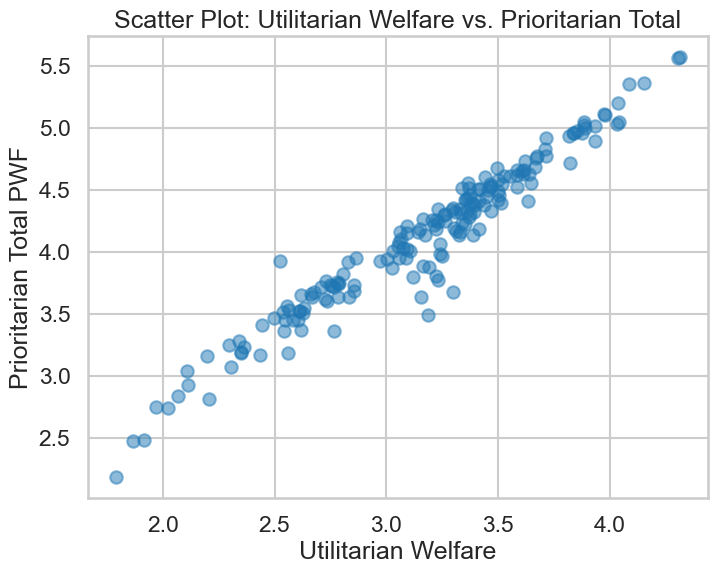

In [42]:
# Extract the 'utilitarian_welfare' and 'total_pwf' columns from your DataFrame
utilitarian_welfare = df_pwf['utilitarian_welfare']
prioritarian_total_pwf = df_pwf['total_pwf']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(utilitarian_welfare, prioritarian_total_pwf, alpha=0.5)
plt.title("Scatter Plot: Utilitarian Welfare vs. Prioritarian Total")
plt.xlabel("Utilitarian Welfare")
plt.ylabel("Prioritarian Total PWF")
plt.grid(True)

# Show the plot
plt.show()

In [43]:
# Create an empty list to store DataFrames
dfs = []

# Iterate through the original DataFrame and extract data
for index, row in df_pwf.iterrows():
    gamma_values = row["gamma_values"]
    pwf_values = row["pwf_values"]
    objectives = df_none.columns
    
    # Create a DataFrame for each combination of gamma, transformed value, and objective
    for gamma, transformed_value, objective in zip(gamma_values, pwf_values, objectives):
        data = {"Objective_Value": [row[objective]], "Transformed_Value": [transformed_value], "Gamma_Value": [gamma]}
        dfs.append(pd.DataFrame(data))

# Concatenate all the DataFrames into one
df_pwf_transformation = pd.concat(dfs, ignore_index=True)

# Now new_df contains the transformed values with corresponding objectives and gamma values
df_pwf_transformation

Objective_Value  Transformed_Value  Gamma_Value
0            0.466190           0.768937     0.260420
1            0.655546           0.844112     0.166737
2            0.152542           0.570240     0.415596
3            0.798166           0.902455     0.096176
4            0.869124           0.933617     0.061070
...               ...                ...          ...
1057         0.422934           0.585808     0.166681
1058         0.186441           0.546589     0.367574
1059         0.619154           0.619154     0.000000
1060         0.536832           0.602858     0.069930
1061         0.455309           0.590135     0.139180

[1062 rows x 3 columns]

In [44]:
# Define the tolerance for being near the values
tolerance = 0.05  # You can adjust this tolerance as needed

# Define the values you want to select
values_to_select = [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize an empty boolean mask
combined_mask = np.zeros(len(df_pwf_transformation), dtype=bool)

# Iterate through the values and create masks
for value in values_to_select:
    mask = np.isclose(df_pwf_transformation['Gamma_Value'], value, atol=tolerance)
    combined_mask |= mask  # Combine masks using logical OR

# Use the combined mask to select the rows
df_pwf_TMasked = df_pwf_transformation[combined_mask]

# Round the 'Gamma_Value' column to the desired number of decimal places
df_pwf_TMasked = df_pwf_TMasked.copy()
df_pwf_TMasked['Rounded_Gamma_Value'] = df_pwf_TMasked['Gamma_Value'].round(1)

# Print the selected DataFrame
df_pwf_TMasked

Objective_Value  Transformed_Value  Gamma_Value  Rounded_Gamma_Value
0            0.466190           0.768937     0.260420                  0.3
1            0.655546           0.844112     0.166737                  0.2
2            0.152542           0.570240     0.415596                  0.4
5            0.992561           0.992561     0.000000                  0.0
6            0.237496           0.503261     0.287032                  0.3
...               ...                ...          ...                  ...
1055         0.938455           0.938455     0.000000                  0.0
1056         0.317040           0.572721     0.256634                  0.3
1057         0.422934           0.585808     0.166681                  0.2
1058         0.186441           0.546589     0.367574                  0.4
1059         0.619154           0.619154     0.000000                  0.0

[837 rows x 4 columns]

# !! Waarom minder observaties bij hogere gamma's?

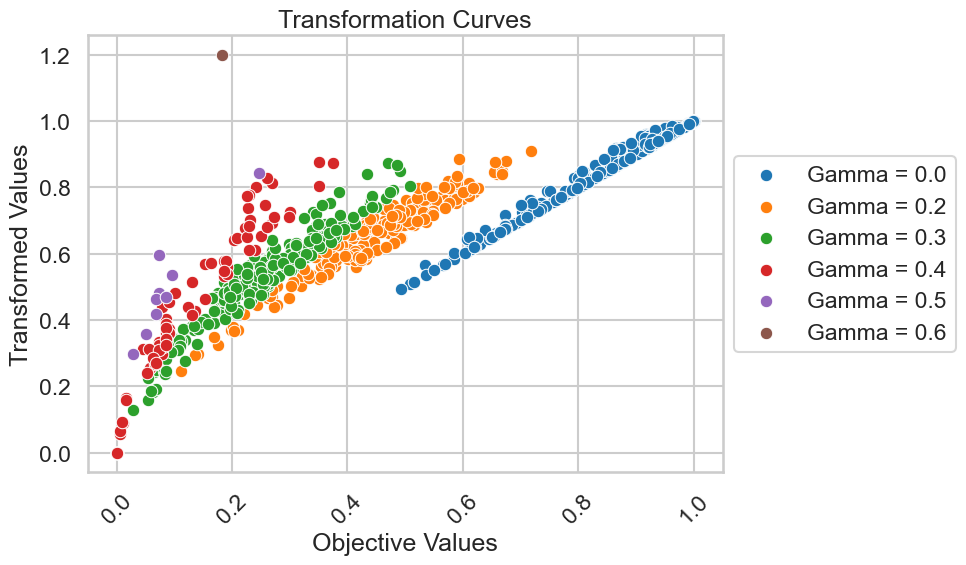

In [45]:
# Set Seaborn style and context
sns.set(style='whitegrid')
sns.set_context("talk")

# Group the data by gamma value
grouped = df_pwf_TMasked.groupby('Rounded_Gamma_Value')

# Define a color palette for different gamma values (colorblind-friendly)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group (gamma value) and create a scatter plot
for i, (name, group) in enumerate(grouped):
    # Use a different color and marker style for each gamma value
    sns.scatterplot(
        x=group['Objective_Value'],
        y=group['Transformed_Value'],
        label=f'Gamma = {name:.1f}',
        color=colors[i % len(colors)],  # Loop through colors if more groups
        marker='o',
        ax=ax
    )

# Set labels and title
ax.set_xlabel('Objective Values')
ax.set_ylabel('Transformed Values')
ax.set_title('Transformation Curves')

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### 2.2.5.2 Compare tradeoffs between principles

In [46]:
# the direction at which the objectives are optimized are put in a dictionary
# directions_principles = {'utilitarian_welfare': 'max', 'sufficitarian_welfare': 'max', 'prioritarian_welfare': 'max', 'gini_index': 'min'}
directions_principles = {'utilitarian_welfare': 'max', 'total_pwf': 'max', 'gini_index': 'min'}

In [47]:
best_solutions_principles = get_best_solutions(df_gini, directions_principles)

In [48]:
created_vars_names, created_vars = create_global_variables(best_solutions_principles, df_gini)

In [49]:
print(best_solutions_principles)

{'utilitarian_welfare': 136, 'total_pwf': 136, 'gini_index': 172}


['All Solutions' 'best_utilitarian_welfare_total_pwf' 'best_gini_index']


I'm here


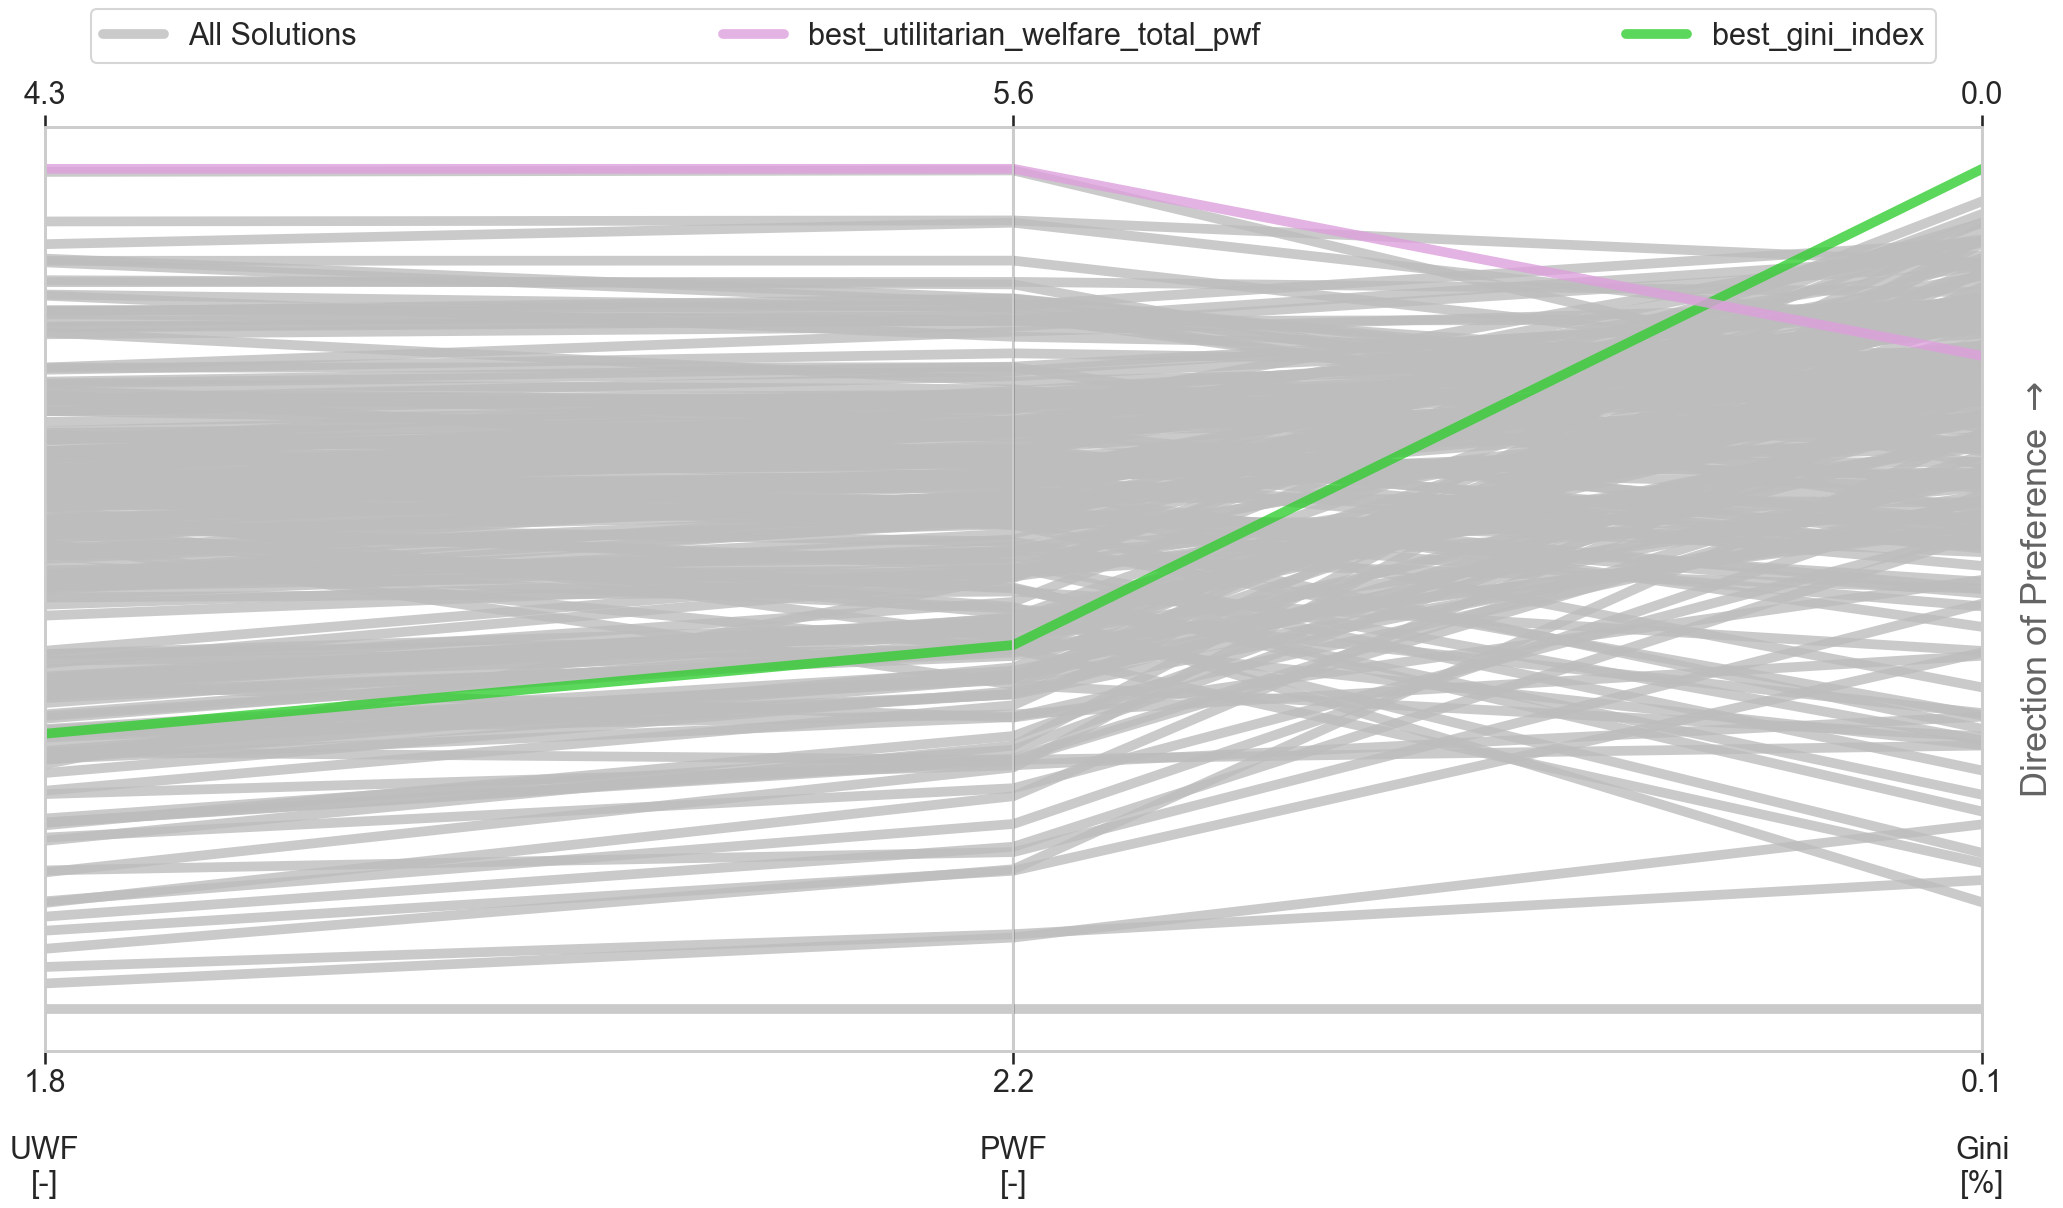

In [50]:
from plotter import parallel_plots_many_policies

parallel_plots_many_policies(
    df_gini[["utilitarian_welfare", "total_pwf", "gini_index"]],
    created_vars,
    created_vars_names,
        names_display=[
        "UWF",
        "PWF",
        "Gini",
    ],
    units=["-", "-", "%", "-"],
    directions=["max", "max", "min"],
)
plt.show()

# 3. A Priori Analysis

In [51]:
objective_results_dict = objective_results.copy() 
for key, df in objective_results_dict.items():
    if len(df.columns) > 6:
        # Drop the last columns if there are more than 6
        df.drop(df.columns[-(len(df.columns) - 6):], axis=1, inplace=True)

C:\Users\meron\AppData\Local\Temp\ipykernel_2500\1709144163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.columns[-(len(df.columns) - 6):], axis=1, inplace=True)


In [52]:
objective_results_dict

{'None':      egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  ethiopia_hydro
 0     4.708346  1.691684       0.141667   9.946539  1.706105       15.030984
 1     3.846794  1.288469       0.158333  10.314356  1.565600       11.831712
 2     5.077042  1.283620       0.754167   8.805921  1.446252       12.241481
 3     4.967579  1.476072       0.400000   6.798282  1.467693       10.259496
 4     5.367931  1.861499       0.495833   5.975961  1.379873       11.067578
 ..         ...       ...            ...        ...       ...             ...
 172   4.395644  1.489867       0.283333   7.617323  1.469091        9.452211
 173   3.692827  1.284626       0.216667  10.632840  1.596565       12.097595
 174   5.279238  1.743900       0.258333   7.639305  1.599628       15.025730
 175   3.454759  1.013864       0.079167  10.681013  1.735744       14.319497
 176   4.146458  1.367876       0.166667   8.958400  1.525423        7.966226
 
 [177 rows x 6 columns],
 'uwf':      egypt_irr  egypt

In [53]:
# Initialize empty dictionaries
best_solutions_dict = {}
created_vars_names_dict = {}
created_vars_dict = {}

# Iterate through the dictionary
for key, obj_df in objective_results.items():
    # Calculate best solutions, created variables, and variable names
    best_solutions = get_best_solutions(obj_df, directions)
    created_vars_names, created_vars = create_global_variables(best_solutions, obj_df)

    # Store the results in dictionaries using the dataframe's key as the key in the dictionary
    created_vars_names_dict[key] = created_vars_names
    created_vars_dict[key] = created_vars

In [54]:
created_vars_names_dict

{'None': ['best_egypt_irr',
  'best_egypt_90',
  'best_egypt_low_had',
  'best_sudan_irr_sudan_90',
  'best_ethiopia_hydro'],
 'uwf': ['best_egypt_irr',
  'best_egypt_90',
  'best_egypt_low_had',
  'best_sudan_irr',
  'best_sudan_90',
  'best_ethiopia_hydro'],
 'pwf': ['best_egypt_irr',
  'best_egypt_90',
  'best_egypt_low_had',
  'best_sudan_irr',
  'best_sudan_90',
  'best_ethiopia_hydro'],
 'gini': ['best_egypt_irr',
  'best_egypt_90',
  'best_egypt_low_had',
  'best_sudan_irr_sudan_90',
  'best_ethiopia_hydro']}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


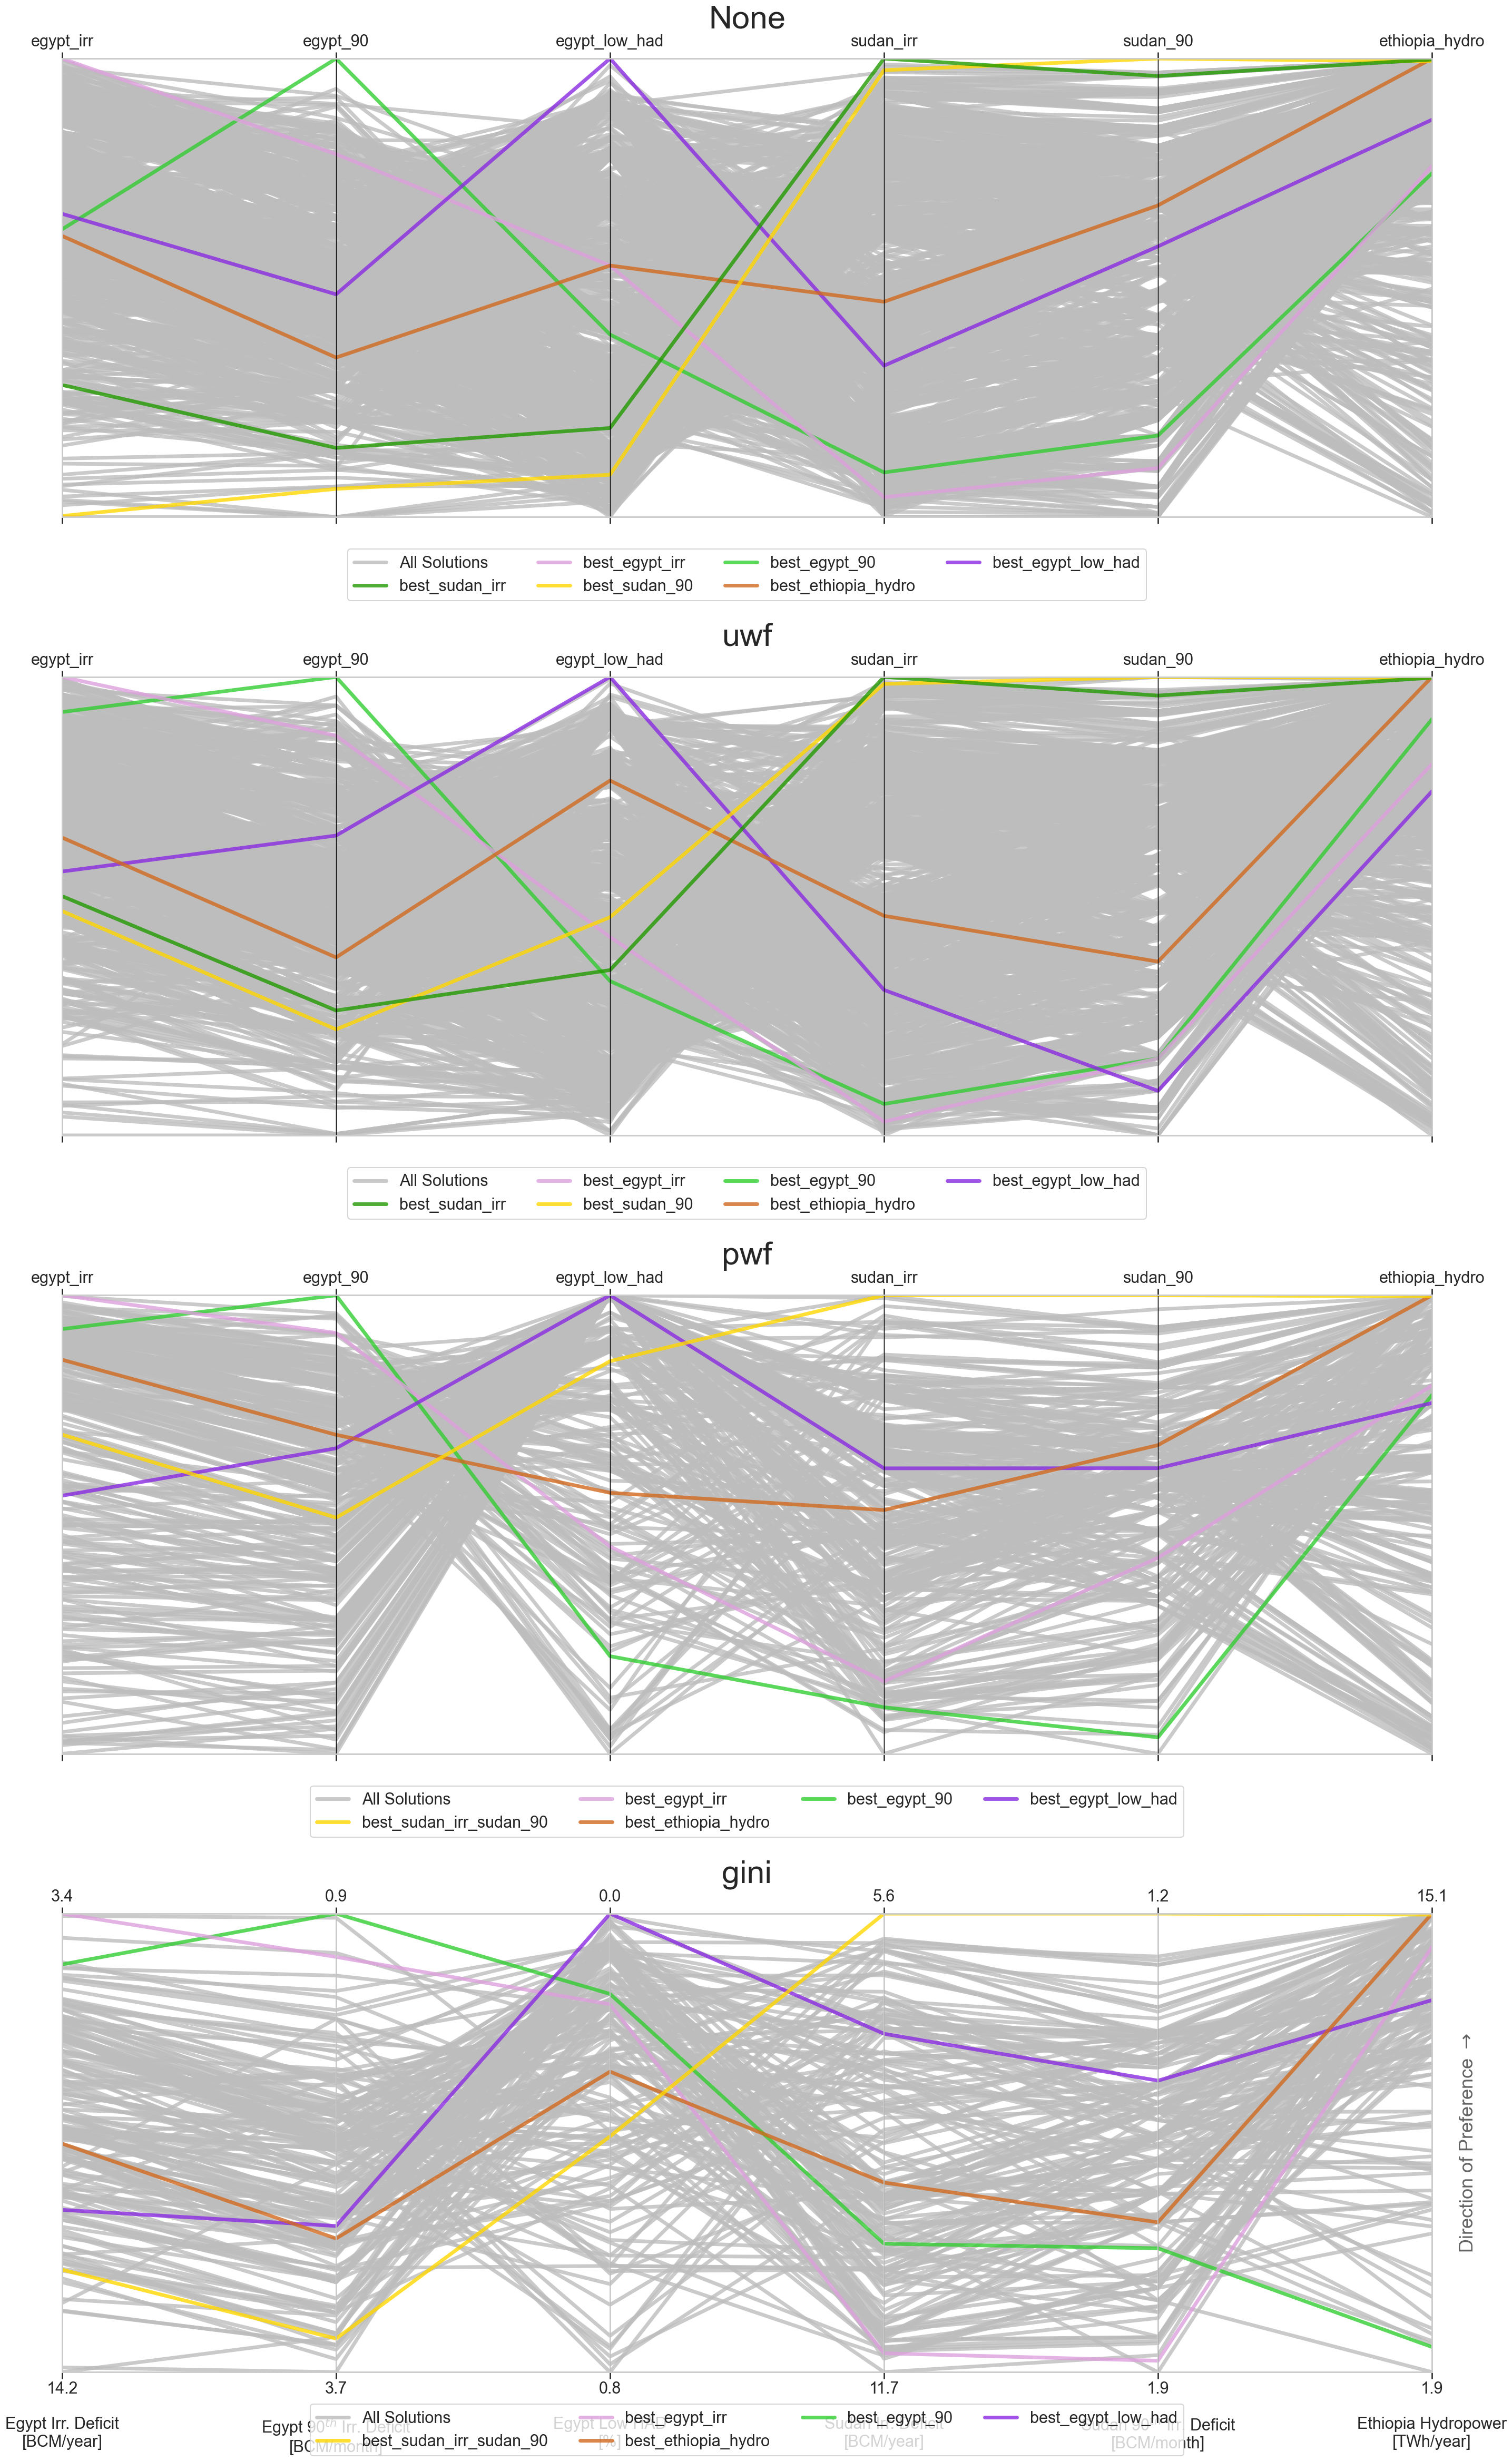

In [55]:
parallel_plots_many_principles(
        objective_results_dict,
        created_vars_dict,
        created_vars_names_dict,
        names_display=[
            "Egypt Irr. Deficit",
            "Egypt 90$^{th}$ Irr. Deficit",
            "Egypt Low HAD",
            "Sudan Irr. Deficit",
            "Sudan 90$^{th}$ Irr. Deficit",
            "Ethiopia Hydropower",
        ],
        units=["BCM/year", "BCM/month", "%", "BCM/year", "BCM/month", "TWh/year", "-"],
        directions=["min", "min", "min", "min", "min", "max", "max"]
    )


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from pandas.plotting import parallel_coordinates

#figsize = (11,6)

In [65]:
### function to normalize data based on direction of preference and whether each objective is minimized or maximized
###   -> output dataframe will have values ranging from 0 (which maps to bottom of figure) to 1 (which maps to top)
def reorganize_objs(objs, columns_axes, ideal_direction, minmaxs):
    ### if min/max directions not given for each axis, assume all should be maximized
    if minmaxs is None:
        minmaxs = ['max']*len(columns_axes)
        
    ### get subset of dataframe columns that will be shown as parallel axes
    objs_reorg = objs[columns_axes]
    
    ### reorganize & normalize data to go from 0 (bottom of figure) to 1 (top of figure), 
    ### based on direction of preference for figure and individual axes
    if ideal_direction == 'bottom':
        tops = objs_reorg.min(axis=0)
        bottoms = objs_reorg.max(axis=0)
        for i, minmax in enumerate(minmaxs):
            if minmax == 'max':
                objs_reorg.iloc[:, i] = (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i]) / \
                                        (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i].min(axis=0))
            else:
                bottoms[i], tops[i] = tops[i], bottoms[i]
                objs_reorg.iloc[:, -1] = (objs_reorg.iloc[:, -1] - objs_reorg.iloc[:, -1].min(axis=0)) / \
                                         (objs_reorg.iloc[:, -1].max(axis=0) - objs_reorg.iloc[:, -1].min(axis=0))
    elif ideal_direction == 'top':
        tops = objs_reorg.max(axis=0)
        bottoms = objs_reorg.min(axis=0)
        for i, minmax in enumerate(minmaxs):
            if minmax == 'max':
                objs_reorg.iloc[:, i] = (objs_reorg.iloc[:, i] - objs_reorg.iloc[:, i].min(axis=0)) / \
                                        (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i].min(axis=0))
            else:
                bottoms[i], tops[i] = tops[i], bottoms[i]
                objs_reorg.iloc[:, i] = (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i]) / \
                                        (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i].min(axis=0))

    return objs_reorg, tops, bottoms

In [66]:
### function to get color based on continuous color map or categorical map
def get_color(value, color_by_continuous, color_palette_continuous, 
              color_by_categorical, color_dict_categorical):
    if color_by_continuous is not None:
        color = colormaps.get_cmap(color_palette_continuous)(value)
    elif color_by_categorical is not None:
        color = color_dict_categorical[value]
    return color

In [67]:
### function to get zorder value for ordering lines on plot. 
### This works by binning a given axis' values and mapping to discrete classes.
def get_zorder(norm_value, zorder_num_classes, zorder_direction):
    xgrid = np.arange(0, 1.001, 1/zorder_num_classes)
    if zorder_direction == 'ascending':
        return 4 + np.sum(norm_value > xgrid)
    elif zorder_direction == 'descending':
        return 4 + np.sum(norm_value < xgrid)

In [68]:
### customizable parallel coordinates plot
def custom_parallel_coordinates(objs, columns_axes=None, axis_labels=None, 
                                ideal_direction='top', minmaxs=None, 
                                color_by_continuous=None, color_palette_continuous=None, 
                                color_by_categorical=None, color_palette_categorical=None,
                                colorbar_ticks_continuous=None, color_dict_categorical=None,
                                zorder_by=None, zorder_num_classes=10, zorder_direction='ascending', 
                                alpha_base=0.8, brushing_dict=None, alpha_brush=0.05, 
                                lw_base=1.5, fontsize=14, 
                                figsize=(11,6), save_fig_filename=None):
    
    ### verify that all inputs take supported values
    assert ideal_direction in ['top','bottom']
    assert zorder_direction in ['ascending', 'descending']
    if minmaxs is not None:
        for minmax in minmaxs:
            assert minmax in ['max','min']
    assert color_by_continuous is None or color_by_categorical is None
    if columns_axes is None:
        columns_axes = objs.columns
    if axis_labels is None:
        axis_labels = column_axes
    
    ### create figure
    fig,ax = plt.subplots(1,1,figsize=figsize, gridspec_kw={'hspace':0.1, 'wspace':0.1})

    ### reorganize & normalize objective data
    objs_reorg, tops, bottoms = reorganize_objs(objs, columns_axes, ideal_direction, minmaxs)

    ### apply any brushing criteria
    if brushing_dict is not None:
        satisfice = np.zeros(objs.shape[0]) == 0.
        ### iteratively apply all brushing criteria to get satisficing set of solutions
        for col_idx, (threshold, operator) in brushing_dict.items():
            if operator == '<':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] < threshold)
            elif operator == '<=':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] <= threshold)
            elif operator == '>':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] > threshold)
            elif operator == '>=':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] >= threshold)

            ### add rectangle patch to plot to represent brushing
            threshold_norm = (threshold - bottoms[col_idx]) / (tops[col_idx] - bottoms[col_idx])
            if ideal_direction == 'top' and minmaxs[col_idx] == 'max':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
            elif ideal_direction == 'top' and minmaxs[col_idx] == 'min':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
            if ideal_direction == 'bottom' and minmaxs[col_idx] == 'max':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
            elif ideal_direction == 'bottom' and minmaxs[col_idx] == 'min':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
                    
            pc = PatchCollection([rect], facecolor='grey', alpha=0.5, zorder=3)
            ax.add_collection(pc)
    
    ### loop over all solutions/rows & plot on parallel axis plot
    for i in range(objs_reorg.shape[0]):
        if color_by_continuous is not None:
            color = get_color(objs_reorg[columns_axes[color_by_continuous]].iloc[i], 
                              color_by_continuous, color_palette_continuous, 
                              color_by_categorical, color_dict_categorical)
        elif color_by_categorical is not None:
            color = get_color(objs[color_by_categorical].iloc[i], 
                              color_by_continuous, color_palette_continuous, 
                              color_by_categorical, color_dict_categorical)
                        
        ### order lines according to ascending or descending values of one of the objectives?
        if zorder_by is None:
            zorder = 4
        else:
            zorder = get_zorder(objs_reorg[columns_axes[zorder_by]].iloc[i], 
                                zorder_num_classes, zorder_direction)
            
        ### apply any brushing?
        if brushing_dict is not None:
            if satisfice.iloc[i]:
                alpha = alpha_base
                lw = lw_base
            else:
                alpha = alpha_brush
                lw = 1
                zorder = 2
        else:
            alpha = alpha_base
            lw = lw_base
            
        ### loop over objective/column pairs & plot lines between parallel axes
        for j in range(objs_reorg.shape[1]-1):
            y = [objs_reorg.iloc[i, j], objs_reorg.iloc[i, j+1]]
            x = [j, j+1]
            ax.plot(x, y, c=color, alpha=alpha, zorder=zorder, lw=lw)
            
            
    ### add top/bottom ranges
    for j in range(len(columns_axes)):
        ax.annotate(str(round(tops[j])), [j, 1.02], ha='center', va='bottom', 
                    zorder=5, fontsize=fontsize)
        if j == len(columns_axes)-1:
            ax.annotate(str(round(bottoms[j])) + '+', [j, -0.02], ha='center', va='top', 
                        zorder=5, fontsize=fontsize)    
        else:
            ax.annotate(str(round(bottoms[j])), [j, -0.02], ha='center', va='top', 
                        zorder=5, fontsize=fontsize)    

        ax.plot([j,j], [0,1], c='k', zorder=1)
    
    ### other aesthetics
    ax.set_xticks([])
    ax.set_yticks([])
    
    for spine in ['top','bottom','left','right']:
        ax.spines[spine].set_visible(False)

    if ideal_direction == 'top':
        ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
    elif ideal_direction == 'bottom':
        ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
    ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center',
                rotation=90, fontsize=fontsize)

    ax.set_xlim(-0.4, 4.2)
    ax.set_ylim(-0.4,1.1)
    
    for i,l in enumerate(axis_labels):
        ax.annotate(l, xy=(i,-0.12), ha='center', va='top', fontsize=fontsize)
    ax.patch.set_alpha(0)
    

    ### colorbar for continuous legend
    if color_by_continuous is not None:
        mappable = cm.ScalarMappable(cmap=color_palette_continuous)
        mappable.set_clim(vmin=objs[columns_axes[color_by_continuous]].min(), 
                          vmax=objs[columns_axes[color_by_continuous]].max())
        cb = plt.colorbar(mappable, ax=ax, orientation='horizontal', shrink=0.4, 
                          label=axis_labels[color_by_continuous], pad=0.03, 
                          alpha=alpha_base)
        if colorbar_ticks_continuous is not None:
            _ = cb.ax.set_xticks(colorbar_ticks_continuous, colorbar_ticks_continuous, 
                                 fontsize=fontsize)
        _ = cb.ax.set_xlabel(cb.ax.get_xlabel(), fontsize=fontsize)  
    ### categorical legend
    elif color_by_categorical is not None:
        leg = []
        for label,color in color_dict_categorical.items():
            leg.append(Line2D([0], [0], color=color, lw=3, 
                              alpha=alpha_base, label=label))
        _ = ax.legend(handles=leg, loc='lower center', 
                      ncol=max(3, len(color_dict_categorical)),
                      bbox_to_anchor=[0.5,-0.07], frameon=False, fontsize=fontsize)
        
    # ### save figure
    # if save_fig_filename is not None:
    #     plt.savefig(save_fig_filename, bbox_inches='tight', dpi=300)

TypeError: 'float' object is not subscriptable

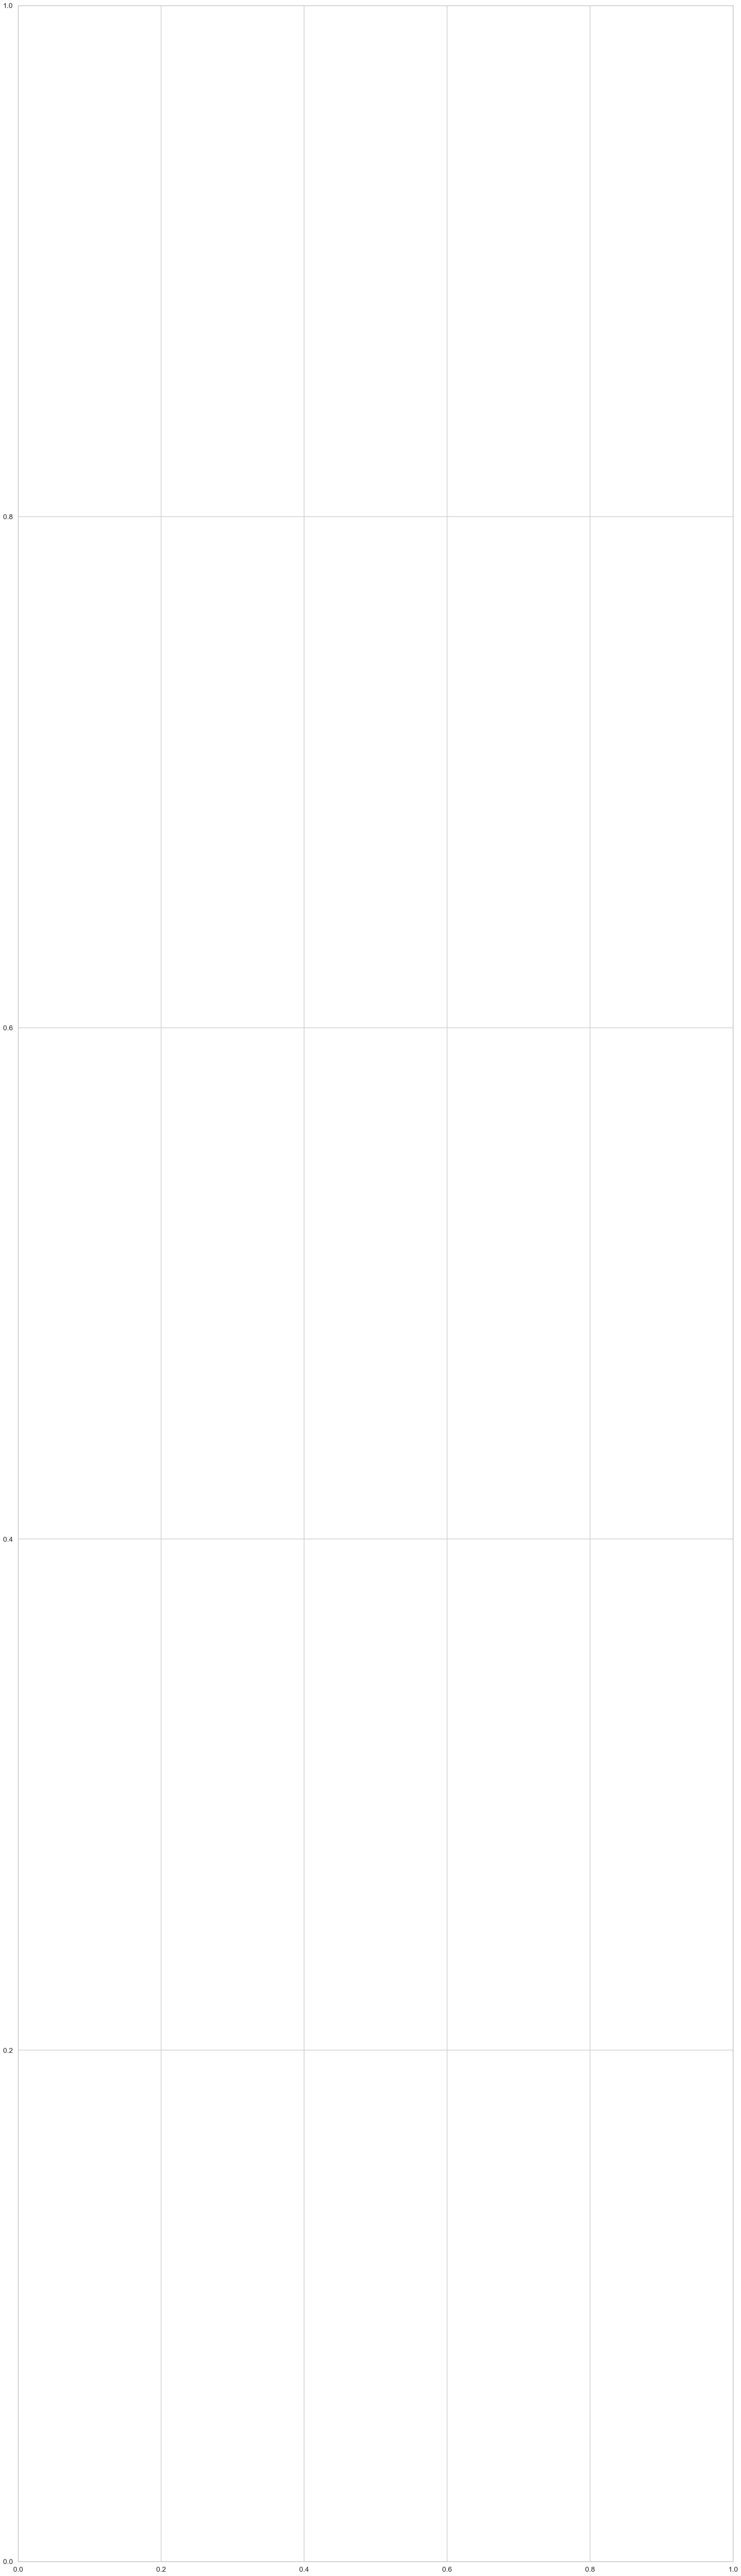

In [76]:
# Get the columns of interest, the original objectives found in the first DataFrame
columns_axes = list(df.columns)[0]

for key, df in objective_results.items():
    custom_parallel_coordinates(df, columns_axes=columns_axes, axis_labels=[
        "Egypt Irr. Deficit", "Egypt 90$^{th}$ Irr. Deficit", "Egypt Low HAD", "Sudan Irr. Deficit",
        "Sudan 90$^{th}$ Irr. Deficit", "Ethiopia Hydropower",],
        color_by_continuous=0, zorder_by=0, ideal_direction='top',
        alpha_base=0.8, lw_base=1.5, fontsize=22, figsize=(30, 12 * len(columns_axes)),
        minmaxs=["min", "min", "min", "min", "min", "max"],
        colorbar_ticks_continuous=range(2, 25, 4))
